<a href="https://colab.research.google.com/github/Polo9422/DS-Proyecto-2/blob/main/Horse_Colic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJETIVO**

Predecir si un caballo puede sobrevivir o no basándose en condiciones médicas




# Hipotesís



*   La edad de un caballo es daterminante si vive o muere cuando se presenta el colico
*   el reflujo nasogastrico influye en la esperanza de vida cuando contrae el colico




# Datos

In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/horse-colic'
od.download(dataset_url)

#Your Kaggle username: juanpolo
#Your Kaggle Key:ea9c77f5f27ddfa60985c61a66d9f013

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juanpolo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/horse-colic


100%|██████████| 11.0k/11.0k [00:00<00:00, 5.74MB/s]

In [3]:
import os
os.chdir('/content/horse-colic')
os.listdir()

['datadict.txt', 'horse.csv']

In [4]:
import pandas as pd
archivo ='horse.csv'
df_h1=pd.read_csv(archivo)


In [5]:
#Datos adicionales que se recolectaron para un mejor analisi
data_H2='https://github.com/Polo9422/DS-Proyecto-2/blob/1067ac449a2031a9777fe1f0fb524e30e8fbe1e4/dataset_H2.csv?raw=true'
df_h2= pd.read_csv(data_H2, sep=',')
df_h2.head()

surgery    age  hospital_number  rectal_temp      pulse  respiratory_rate  \
0      no  young           419278    36.699221  43.897815          9.333830   
1     yes  adult           251563    37.088701  79.157645          9.457304   
2      no  adult           756701    37.213436  75.585478         12.546702   
3      no  adult           799983    37.602465  54.188498         12.482097   
4      no  adult           714615    37.040960  88.221018          8.653039   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                warm        increased      bright_red            less_3_sec   
1                cold           normal     normal_pink            less_3_sec   
2                warm          reduced     bright_pink            less_3_sec   
3                warm        increased   pale_cyanotic            more_3_sec   
4                cold           normal      bright_red            less_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...          49.893983      7.199922             clear       2.577013   
1  ...          44.703679      7.471377             clear       4.489166   
2  ...          34.316735      7.397443             clear       3.848924   
3  ...          46.932881      7.105370             clear       5.742687   
4  ...          38.294653      7.040981     serosanguious       3.567576   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no     2208        2         1       no  
1        died               no    11300        1         2       no  
2        died              yes     4300        2         1      yes  
3  euthanized               no        0        1         2       no  
4  euthanized               no    11300        1         2      yes  

[5 rows x 28 columns]

**Aclaracion**

Los datos subidos de kaggle son de un muestro real, y los datos subidos desde el github son de origen sintetico, fueron creados por IA (Inteligencia Artificial). Con el fin de asumir el reto los datos de kaggle presentaban 19 columnas con mas de un 60% de datos nulos, los datos creados por la IA estan completos y pueden llegar a tener parametros anomalos poco probable de crearse.

# Información de atributos

1: ¿Cirugía?
1 = Sí, se operó
2 = Se trató sin cirugía

2: Edad
1 = Caballo adulto
2 = Joven (< 6 meses)

3: Número de hospital
- id numérico
- número de caso asignado al caballo (puede no ser único si el caballo es tratado > 1 vez)

4: temperatura rectal
- lineal
- en grados centígrados.
- Una temperatura elevada puede deberse a una infección.
- la temperatura puede reducirse cuando el animal se encuentra en estado de shock tardío
- la temperatura normal es de 37,8
- este parámetro suele cambiar a medida que el problema progresa, por ejemplo, puede comenzar normal, luego elevarse debido a la lesión y volver al rango normal a medida que el caballo entra en shock.
5: pulso
- lineal
- la frecuencia cardiaca en latidos por minuto
- es un reflejo del estado del corazón: 30 -40 es normal para los adultos
- es raro tener una frecuencia inferior a la normal, aunque los caballos atléticos pueden tener una frecuencia de 20-25
- los animales con lesiones dolorosas o que sufren un shock circulatorio pueden tener una frecuencia cardiaca elevada

6: frecuencia respiratoria
- lineal
- la frecuencia normal es de 8 a 10
- utilidad dudosa debido a las grandes fluctuaciones

7: temperatura de las extremidades
- indicación subjetiva de la circulación periférica
- valores posibles:
1 = Normal
2 = Caliente
3 = Fría
4 = Fría
- las extremidades frías indican un posible shock
- las extremidades calientes deben correlacionarse con una temperatura rectal elevada.
8: pulso periférico
- subjetivo
- los valores posibles son:
1 = normal
2 = aumentado
3 = reducido
4 = ausente
- una p.p. normal o aumentada indica una circulación adecuada, mientras que una p.p. reducida o ausente indica una mala perfusión

9: mucosas
- medida subjetiva del color
- los valores posibles son:
1 = rosa normal
2 = rosa brillante
3 = rosa pálido
4 = cianótico pálido
5 = rojo brillante / inyectado
6 = cianótico oscuro
- 1 y 2 probablemente indican una circulación normal o ligeramente aumentada
- 3 puede ocurrir en un shock temprano
- 4 y 6 son indicativos de un compromiso circulatorio grave
- 5 es más indicativo de una septicemia

10: tiempo de relleno capilar
- un juicio clínico. Cuanto más largo sea el llenado, peor será la circulación.
- valores posibles
1 = < 3 segundos
2 = >= 3 segundos

11: dolor: valoración subjetiva del nivel de dolor del caballo
- valores posibles:
1 = alerta, sin dolor
2 = deprimido
3 = dolor leve intermitente
4 = dolor intenso intermitente
5 = dolor intenso continuo
- ¡NO debe tratarse como una variable ordenada o discreta!
- En general, cuanto más doloroso, más probable es que requiera cirugía
- el tratamiento previo del dolor puede enmascarar en cierta medida el nivel de dolor

12: peristaltismo
- una indicación de la actividad en el intestino del caballo. A medida que el intestino se distiende o el caballo se vuelve más tóxico, la actividad disminuye.
- valores posibles:
1 = hipermóvil
2 = normal
3 = hipomóvil
4 = ausente


13: distensión abdominal
- Un parámetro IMPORTANTE.
- valores posibles
1 = ninguna
2 = ligera
3 = moderada
4 = grave
- es probable que un animal con distensión abdominal presente dolor y una motilidad intestinal reducida.
- un caballo con distensión abdominal grave probablemente requiera cirugía sólo para aliviar la presión

14: sonda nasogástrica
- se refiere a cualquier gas que salga por la sonda
- valores posibles:
1 = ninguno
2 = leve
3 = importante
- es probable que un gran tapón de gas en el estómago provoque molestias al caballo

15: reflujo nasogástrico
- valores posibles
1 = ninguno
2 = > 1 litro
3 = < 1 litro
- a mayor cantidad de reflujo, mayor probabilidad de que exista alguna obstrucción grave al paso de fluidos desde el resto del intestino

16: reflujo nasogástrico PH
- lineal
- escala de 0 a 14, siendo 7 neutro
- los valores normales están en el rango de 3 a 4

17: tacto rectal - heces
- valores posibles
1 = normal
2 = aumentado
3 = disminución
4 = ausente
- la ausencia de heces indica probablemente una obstrucción

18: abdomen
- valores posibles
1 = normal
2 = otros
3 = heces firmes en el intestino grueso
4 = intestino delgado distendido
5 = intestino grueso distendido
- 3 es probablemente una obstrucción causada por una impactación mecánica y normalmente se trata médicamente
- 4 y 5 indican una lesión quirúrgica


19: volumen celular empaquetado
- lineal
- número de glóbulos rojos por volumen en la sangre
- El rango normal es de 30 a 50. El nivel aumenta cuando la circulación se ve comprometida o cuando el animal se deshidrata.

20: proteína total
- lineal
- los valores normales se sitúan entre 6 y 7,5 (gms/dL)
- a mayor valor, mayor deshidratación

21: aspecto de la abdominocentesis
- se introduce una aguja en el abdomen del caballo y se obtiene líquido de
la cavidad abdominal
- valores posibles:
1 = claro
2 = turbio
3 = serosanguinolento
- el líquido normal es claro, mientras que el turbio o serosanguinolento indica un intestino comprometido

22: abdomcentesis proteína total
- lineal
- cuanto más alto sea el nivel de proteínas, más probable es que el intestino esté comprometido. Los valores se expresan en gms/dL

23: desenlace
- ¿qué le ocurrió finalmente al caballo?
- valores posibles:
1 = vivió
2 = murió
3 = fue eutanasiado

24: ¿lesión quirúrgica?
- retrospectivamente, ¿el problema (lesión) era quirúrgico?
- todos los casos son operados o se les realiza una autopsia, por lo que siempre se conocen este valor y el tipo de lesión
- valores posibles:
1 = Sí
2 = No

25, 26, 27: tipo de lesión
- el primer número corresponde al lugar de la lesión
1 = gástrico
2 = intestino delgado
3 = colon largo
4 = colon largo y ciego
5 = ciego
6 = colon transverso
7 = Retum/colon descendente
8 = útero
9 = vejiga
11 = todos los sitios intestinales
00 = ninguno
- el segundo número es el tipo
1 = simple
2 = estrangulación
3 = inflamación
4 = otro
- el tercer número es el subtipo
1 = mecánico
2 = paralítico
0 = n/a
- el cuarto número es el código específico
1 = obturación
2 = intrínseca
3 = extrínseco
4 = adinámico
5 = vólvulo/torsión
6 = intusupción
7 = tromboembólico
8 = hernia
9 = lipoma/incarceración glénica
10 = desplazamiento
0 = n/a
28: cp_data
- ¿hay datos patológicos para este caso?
1 = Sí
2 = No
- esta variable no es significativa, ya que no se incluyen ni se recogen datos patológicos para estos casos.


# Limpieza/Transformación





In [6]:
df_horse = pd.concat([df_h1, df_h2], axis=0)
df_horse.head()

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                cool          reduced             NaN            more_3_sec   
1                 NaN              NaN   pale_cyanotic            less_3_sec   
2              normal           normal       pale_pink            less_3_sec   
3                cold           normal   dark_cyanotic            more_3_sec   
4                 NaN              NaN   dark_cyanotic            more_3_sec   

   ... packed_cell_volume total_protein abdomo_appearance abdomo_protein  \
0  ...               45.0           8.4               NaN            NaN   
1  ...               50.0          85.0            cloudy            2.0   
2  ...               33.0           6.7               NaN            NaN   
3  ...               48.0           7.2     serosanguious            5.3   
4  ...               74.0           7.4               NaN            NaN   

      outcome  surgical_lesion lesion_1 lesion_2  lesion_3  cp_data  
0        died               no    11300        0         0       no  
1  euthanized               no     2208        0         0       no  
2       lived               no        0        0         0      yes  
3        died              yes     2208        0         0      yes  
4        died               no     4300        0         0       no  

[5 rows x 28 columns]

In [7]:
df_horse.shape

(1299, 28)

In [8]:
print("Columnas originales:")
print(df_horse.columns)

Columnas originales:
Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')


Reemplazo los nombres de las columnas originales por su traducción para mayor facilidad de legibilidad

In [9]:
nuevos_nombres= {'surgery':'cirugía', 'age':'edad', 'hospital_number':'número_hospital', 'rectal_temp':'temperatura_rectal', 'pulse':'pulso',
       'respiratory_rate':'frecuencia_respiratoria', 'temp_of_extremities':'temp_de_extremidades', 'peripheral_pulse':'pulso_periférico',
       'mucous_membrane':'membrana_mucosa', 'capillary_refill_time':'tiempo_rellenado_capilar', 'pain':'dolor', 'peristalsis':'peristaltismo',
       'abdominal_distention':'distensión_abdominal', 'nasogastric_tube':'tubo_nasogástrico', 'nasogastric_reflux':'reflujo_nasogástrico',
       'nasogastric_reflux_ph':'reflujo_nasogástrico_ph',  'rectal_exam_feces':'rectal_exam_feces','abdomen':'abdomen',
       'packed_cell_volume':'volumen_celular_sangre', 'total_protein':'total_proteinas', 'abdomo_appearance':'apariencia_abdominal',
       'abdomo_protein':'proteina_abdominal', 'outcome':'resultado', 'surgical_lesion':'lesión_quirúrgica', 'lesion_1':'lesión_1', 'lesion_2':'lesión_2',
       'lesion_3':'lesión_3', 'cp_data':'datos_patológicos'}


df_horse= df_horse.rename(columns = nuevos_nombres)
df_horse.head()

cirugía   edad  número_hospital  temperatura_rectal  pulso  \
0      no  adult           530101                38.5   66.0   
1     yes  adult           534817                39.2   88.0   
2      no  adult           530334                38.3   40.0   
3     yes  young          5290409                39.1  164.0   
4      no  adult           530255                37.3  104.0   

   frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
0                     28.0                 cool          reduced   
1                     20.0                  NaN              NaN   
2                     24.0               normal           normal   
3                     84.0                 cold           normal   
4                     35.0                  NaN              NaN   

  membrana_mucosa tiempo_rellenado_capilar  ... volumen_celular_sangre  \
0             NaN               more_3_sec  ...                   45.0   
1   pale_cyanotic               less_3_sec  ...                   50.0   
2       pale_pink               less_3_sec  ...                   33.0   
3   dark_cyanotic               more_3_sec  ...                   48.0   
4   dark_cyanotic               more_3_sec  ...                   74.0   

  total_proteinas apariencia_abdominal proteina_abdominal   resultado  \
0             8.4                  NaN                NaN        died   
1            85.0               cloudy                2.0  euthanized   
2             6.7                  NaN                NaN       lived   
3             7.2        serosanguious                5.3        died   
4             7.4                  NaN                NaN        died   

   lesión_quirúrgica lesión_1 lesión_2  lesión_3  datos_patológicos  
0                 no    11300        0         0                 no  
1                 no     2208        0         0                 no  
2                 no        0        0         0                yes  
3                yes     2208        0         0                yes  
4                 no     4300        0         0                 no  

[5 rows x 28 columns]

In [10]:
df_horse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cirugía                   1299 non-null   object 
 1   edad                      1299 non-null   object 
 2   número_hospital           1299 non-null   int64  
 3   temperatura_rectal        1239 non-null   float64
 4   pulso                     1275 non-null   float64
 5   frecuencia_respiratoria   1241 non-null   float64
 6   temp_de_extremidades      1243 non-null   object 
 7   pulso_periférico          1230 non-null   object 
 8   membrana_mucosa           1252 non-null   object 
 9   tiempo_rellenado_capilar  1267 non-null   object 
 10  dolor                     1244 non-null   object 
 11  peristaltismo             1255 non-null   object 
 12  distensión_abdominal      1243 non-null   object 
 13  tubo_nasogástrico         1195 non-null   object 
 14  reflujo_nasogá

In [11]:
df_horse.describe(include = 'object').T

count unique            top freq
cirugía                   1299      2            yes  690
edad                      1299      2          adult  801
temp_de_extremidades      1243      4           cool  338
pulso_periférico          1230      4        reduced  366
membrana_mucosa           1252      6    normal_pink  265
tiempo_rellenado_capilar  1267      3     less_3_sec  710
dolor                     1244      7      mild_pain  272
peristaltismo             1255      6         absent  352
distensión_abdominal      1243      4           none  326
tubo_nasogástrico         1195      4         slight  450
reflujo_nasogástrico      1193      4           none  440
rectal_exam_feces         1197      4         absent  413
abdomen                   1181      5  distend_large  419
apariencia_abdominal      1134      3          clear  384
resultado                 1299      3          lived  468
lesión_quirúrgica         1299      2            yes  711
datos_patológicos         1299      2             no  693

In [12]:
df_horse.describe().T

count           mean            std            min  \
número_hospital          1299.0  685840.461124  800135.157704  106154.000000   
temperatura_rectal       1239.0      37.845811       0.952821      34.911729   
pulso                    1275.0      62.505227      22.103592      20.000000   
frecuencia_respiratoria  1241.0      13.185082      11.811914       2.000000   
reflujo_nasogástrico_ph  1053.0       5.977621       2.299869       1.000000   
volumen_celular_sangre   1270.0      41.374398       7.474908      23.000000   
total_proteinas          1266.0      10.437478      14.421356       3.300000   
proteina_abdominal       1101.0       3.893371       1.263956       0.100000   
lesión_1                 1299.0    4344.850654    4624.569995       0.000000   
lesión_2                 1299.0      21.979215     314.000879       0.000000   
lesión_3                 1299.0       2.500385      61.273822       0.000000   

                                   25%            50%            75%  \
número_hospital          396089.000000  533928.000000  764514.000000   
temperatura_rectal           37.203757      37.879993      38.478616   
pulso                        47.235654      60.027593      76.033650   
frecuencia_respiratoria       7.434280       9.706165      13.014076   
reflujo_nasogástrico_ph       4.057417       5.891273       7.991341   
volumen_celular_sangre       35.625369      40.967688      46.000000   
total_proteinas               6.410928       6.812440       7.251876   
proteina_abdominal            2.890776       3.847993       4.866526   
lesión_1                    400.000000    3111.000000    4300.000000   
lesión_2                      0.000000       1.000000       2.000000   
lesión_3                      0.000000       1.000000       2.000000   

                                  max  
número_hospital          5.305629e+06  
temperatura_rectal       4.080000e+01  
pulso                    1.840000e+02  
frecuencia_respiratoria  9.600000e+01  
reflujo_nasogástrico_ph  9.997386e+00  
volumen_celular_sangre   7.500000e+01  
total_proteinas          8.900000e+01  
proteina_abdominal       1.010000e+01  
lesión_1                 4.111000e+04  
lesión_2                 7.111000e+03  
lesión_3                 2.209000e+03

In [13]:
print(df_horse.isnull().sum())

cirugía                       0
edad                          0
número_hospital               0
temperatura_rectal           60
pulso                        24
frecuencia_respiratoria      58
temp_de_extremidades         56
pulso_periférico             69
membrana_mucosa              47
tiempo_rellenado_capilar     32
dolor                        55
peristaltismo                44
distensión_abdominal         56
tubo_nasogástrico           104
reflujo_nasogástrico        106
reflujo_nasogástrico_ph     246
rectal_exam_feces           102
abdomen                     118
volumen_celular_sangre       29
total_proteinas              33
apariencia_abdominal        165
proteina_abdominal          198
resultado                     0
lesión_quirúrgica             0
lesión_1                      0
lesión_2                      0
lesión_3                      0
datos_patológicos             0
dtype: int64


**Rellenado de valores nulos**




In [14]:
#Columnas de tipo "float64" con valores nulos: temperatura_rectal, pulso, frecuencia_respiratoria, reflujo_nasogástrico_ph, volumen_celular_sangre, total_proteinas, proteina_abdominal

#Columnas de tipo "object" con valores nulos: temp_de_extremidades, pulso_periférico, membrana_mucosa, tiempo_rellenado_capilar, dolor, peristaltismo, distensión_abdominal, tubo_nasogástrico, reflujo_nasogástrico, rectal_exam_feces, abdomen, apariencia_abdominal

In [15]:
#Observo que porcentaje de mi dataframe tiene todos los datos completos
df_sin_faltantes = df_horse[df_horse.notna().all(axis=1)]
df_sin_faltantes

cirugía   edad  número_hospital  temperatura_rectal       pulso  \
10      yes  adult           528548           38.100000   66.000000   
54       no  adult           529461           40.300000  114.000000   
64      yes  adult           529667           39.000000   64.000000   
91       no  adult           529461           40.300000  114.000000   
104     yes  adult           527563           37.800000   52.000000   
..      ...    ...              ...                 ...         ...   
995      no  adult           924899           37.610586   54.408634   
996      no  young           396037           36.259752   40.046509   
997     yes  adult           176329           39.783386   80.732937   
998     yes  adult           131007           38.349231   98.031185   
999      no  adult           794892           40.434222   64.896387   

     frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
10                 12.000000                 cool          reduced   
54                 36.000000                 cool          reduced   
64                 36.000000                 cool           normal   
91                 36.000000                 cool          reduced   
104                24.000000               normal          reduced   
..                       ...                  ...              ...   
995                10.774247                 warm           absent   
996                 9.215643                 cold           normal   
997                10.414320               normal           absent   
998                12.171049                 cool          reduced   
999                 9.596384                 cool           normal   

    membrana_mucosa tiempo_rellenado_capilar  ... volumen_celular_sangre  \
10       bright_red               less_3_sec  ...              44.000000   
54      normal_pink               more_3_sec  ...              57.000000   
64    pale_cyanotic               more_3_sec  ...              44.000000   
91      normal_pink               more_3_sec  ...              57.000000   
104       pale_pink               less_3_sec  ...              48.000000   
..              ...                      ...  ...                    ...   
995       pale_pink               more_3_sec  ...              34.033429   
996   pale_cyanotic               less_3_sec  ...              31.487914   
997     normal_pink               more_3_sec  ...              30.418127   
998      bright_red               more_3_sec  ...              49.030581   
999     normal_pink               more_3_sec  ...              44.492216   

    total_proteinas apariencia_abdominal proteina_abdominal   resultado  \
10         6.000000               cloudy           3.600000       lived   
54         8.100000        serosanguious           4.500000  euthanized   
64         7.500000        serosanguious           5.000000       lived   
91         8.100000        serosanguious           4.500000        died   
104        6.600000                clear           3.700000        died   
..              ...                  ...                ...         ...   
995        6.662695               cloudy           5.341712  euthanized   
996        7.114186               cloudy           4.477686        died   
997        6.820494                clear           4.994895        died   
998        6.384940        serosanguious           4.090824  euthanized   
999        7.006635               cloudy           4.473414       lived   

     lesión_quirúrgica lesión_1 lesión_2  lesión_3  datos_patológicos  
10                 yes     2124        0         0                yes  
54                 yes     7400        0         0                yes  
64                 yes     2113        0         0                yes  
91                 yes     3205        0         0                yes  
104                yes     5400        0         0                 no  
..                 ...      ...      ...       ...              

Se optó por segmentar el conjunto de datos según los valores únicos de la variable target ('resultado') con el fin de mejorar la coherencia interna de los datos al imputar los valores nulos. Esta estrategia busca evitar la introducción de valores atípicos o inverosímiles en situaciones donde sería improbable su ocurrencia.

In [16]:
resultados_unicos = df_horse['resultado'].unique()
print(resultados_unicos)

['died' 'euthanized' 'lived']


In [17]:
df_died = df_horse[df_horse['resultado'] == 'died']
df_euthanized = df_horse[df_horse['resultado'] == 'euthanized']
df_lived = df_horse[df_horse['resultado'] == 'lived']

In [18]:
print(df_died.shape)
print(df_euthanized.shape)
print(df_lived.shape)

(433, 28)
(398, 28)
(468, 28)


In [19]:
#Se procede a identificar las columnas que contienen valores nulos dentro del conjunto de datos.
print(df_died.isnull().sum())

cirugía                      0
edad                         0
número_hospital              0
temperatura_rectal          24
pulso                       11
frecuencia_respiratoria     19
temp_de_extremidades        13
pulso_periférico            18
membrana_mucosa             11
tiempo_rellenado_capilar    10
dolor                       12
peristaltismo               15
distensión_abdominal        14
tubo_nasogástrico           25
reflujo_nasogástrico        27
reflujo_nasogástrico_ph     57
rectal_exam_feces           26
abdomen                     33
volumen_celular_sangre       8
total_proteinas             12
apariencia_abdominal        41
proteina_abdominal          53
resultado                    0
lesión_quirúrgica            0
lesión_1                     0
lesión_2                     0
lesión_3                     0
datos_patológicos            0
dtype: int64


Aplico la moda para los valores nulos de las columnas de tipo object y la mediana para los valores numéricos faltantes

In [20]:
columnas_objects = [
    'cirugía',
    'edad',
    'temp_de_extremidades',
    'abdomen',
    'pulso_periférico',
    'membrana_mucosa',
    'tiempo_rellenado_capilar',
    'dolor',
    'peristaltismo',
    'distensión_abdominal',
    'tubo_nasogástrico',
    'reflujo_nasogástrico',
    'rectal_exam_feces',
    'abdomen',
    'apariencia_abdominal',
    'resultado',
    'datos_patológicos'
]

columnas_float64 = [
    'temperatura_rectal',
    'pulso',
    'frecuencia_respiratoria',
    'reflujo_nasogástrico_ph',
    'volumen_celular_sangre',
    'total_proteinas',
    'proteina_abdominal'
]


columnas_int64 = [
    'número_hospital',
    'lesión_1',
    'lesión_2',
    'lesión_3'
]



In [21]:
for columna1 in columnas_objects:
    moda = df_died[columna1].mode().iloc[0]
    df_died[columna1].fillna(moda, inplace=True)
    df_euthanized[columna1].fillna(moda, inplace=True)
    df_lived[columna1].fillna(moda, inplace=True)

for columna2 in columnas_float64:
    median_values = df_died[columnas_float64].median()
    mediana_columna = median_values[columna2]
    df_died[columna2].fillna(mediana_columna, inplace=True)
    median_values = df_euthanized[columnas_float64].median()
    mediana_columna = median_values[columna2]
    df_euthanized[columna2].fillna(mediana_columna, inplace=True)
    median_values = df_lived[columnas_float64].median()
    mediana_columna = median_values[columna2]
    df_lived[columna2].fillna(mediana_columna, inplace=True)

<ipython-input-21-e8a1c4231d62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_died[columna1].fillna(moda, inplace=True)
<ipython-input-21-e8a1c4231d62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_euthanized[columna1].fillna(moda, inplace=True)
<ipython-input-21-e8a1c4231d62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lived[columna1].fillna(moda, inplace=True)
<ipython-input-21-e8a1c4231d62>:10: SettingWithCopyWar

In [22]:
print(df_died.isnull().sum())
print(df_euthanized.isnull().sum())
print(df_lived.isnull().sum())

cirugía                     0
edad                        0
número_hospital             0
temperatura_rectal          0
pulso                       0
frecuencia_respiratoria     0
temp_de_extremidades        0
pulso_periférico            0
membrana_mucosa             0
tiempo_rellenado_capilar    0
dolor                       0
peristaltismo               0
distensión_abdominal        0
tubo_nasogástrico           0
reflujo_nasogástrico        0
reflujo_nasogástrico_ph     0
rectal_exam_feces           0
abdomen                     0
volumen_celular_sangre      0
total_proteinas             0
apariencia_abdominal        0
proteina_abdominal          0
resultado                   0
lesión_quirúrgica           0
lesión_1                    0
lesión_2                    0
lesión_3                    0
datos_patológicos           0
dtype: int64
cirugía                     0
edad                        0
número_hospital             0
temperatura_rectal          0
pulso                      

Utilizo la funcion "concat" para unir de nuevo el dataframe sin valores nulos

In [23]:
df_horse_completado = pd.concat([df_died, df_euthanized, df_lived], ignore_index=True)
df_horse_completado.head()

cirugía   edad  número_hospital  temperatura_rectal  pulso  \
0      no  adult           530101           38.500000   66.0   
1     yes  young          5290409           39.100000  164.0   
2      no  adult           530255           37.300000  104.0   
3     yes  adult           529607           37.883347   60.0   
4      no  young          5291329           38.000000   92.0   

   frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
0                28.000000                 cool          reduced   
1                84.000000                 cold           normal   
2                35.000000                 cool          reduced   
3                 9.459724                 cool          reduced   
4                28.000000               normal           normal   

  membrana_mucosa tiempo_rellenado_capilar  ... volumen_celular_sangre  \
0     bright_pink               more_3_sec  ...                   45.0   
1   dark_cyanotic               more_3_sec  ...                   48.0   
2   dark_cyanotic               more_3_sec  ...                   74.0   
3     bright_pink               less_3_sec  ...                   44.0   
4     bright_pink               less_3_sec  ...                   37.0   

  total_proteinas apariencia_abdominal proteina_abdominal resultado  \
0             8.4                clear           4.015887      died   
1             7.2        serosanguious           5.300000      died   
2             7.4                clear           4.015887      died   
3             8.3                clear           4.015887      died   
4             6.1                clear           4.015887      died   

   lesión_quirúrgica lesión_1 lesión_2  lesión_3  datos_patológicos  
0                 no    11300        0         0                 no  
1                yes     2208        0         0                yes  
2                 no     4300        0         0                 no  
3                yes     2208        0         0                 no  
4                 no        0        0         0                yes  

[5 rows x 28 columns]

# Visualizaciones/Análisis


Viendo valores unicos en cada columna para entender un poco mas los datos

In [24]:

# Identificar columnas numéricas y categóricas
columnas_numericas = df_horse_completado.select_dtypes(include=['float64','int64']).columns
columnas_categoricas = df_horse_completado.select_dtypes(include=['object']).columns

#Identificación de variables numéricas para su manipulación
df_h_numericasC = df_horse_completado.select_dtypes(include=['float64'])
df_h_numericasD = df_horse_completado.select_dtypes(include=['int64'])
df_h_categoricas = df_horse_completado.select_dtypes(include=['object'])


In [25]:
df_horse_completado.describe()


número_hospital  temperatura_rectal        pulso  \
count     1.299000e+03         1299.000000  1299.000000   
mean      6.858405e+05           37.848926    62.462723   
std       8.001352e+05            0.930834    21.901883   
min       1.061540e+05           34.911729    20.000000   
25%       3.960890e+05           37.252526    47.674404   
50%       5.339280e+05           37.883347    60.027593   
75%       7.645140e+05           38.429019    75.861042   
max       5.305629e+06           40.800000   184.000000   

       frecuencia_respiratoria  reflujo_nasogástrico_ph  \
count              1299.000000              1299.000000   
mean                 13.051811                 5.955681   
std                  11.562518                 2.071485   
min                   2.000000                 1.000000   
25%                   7.521124                 4.517213   
50%                   9.732633                 5.798477   
75%                  12.758557                 7.500000   
max                  96.000000                 9.997386   

       volumen_celular_sangre  total_proteinas  proteina_abdominal  \
count             1299.000000      1299.000000         1299.000000   
mean                41.365618        10.345752            3.881556   
std                  7.391322        14.248197            1.164990   
min                 23.000000         3.300000            0.100000   
25%                 35.729307         6.421863            3.070359   
50%                 41.000000         6.808443            3.742145   
75%                 46.000000         7.242568            4.679458   
max                 75.000000        89.000000           10.100000   

           lesión_1     lesión_2     lesión_3  
count   1299.000000  1299.000000  1299.000000  
mean    4344.850654    21.979215     2.500385  
std     4624.569995   314.000879    61.273822  
min        0.000000     0.000000     0.000000  
25%      400.000000     0.000000     0.000000  
50%     3111.000000     1.000000     1.000000  
75%     4300.000000     2.000000     2.000000  
max    41110.000000  7111.000000  2209.000000

In [26]:
df_horse_completado['resultado'].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [27]:
#Unión de valores 'euthanized'y'died' para que la variable target sea binaria y pueda contetar al objetivo de predecir si vieve o muere un caballo
df_horse_completado['resultado']=df_horse_completado['resultado'].replace({'euthanized':'died'})
df_horse_completado['resultado'].unique()

array(['died', 'lived'], dtype=object)

In [28]:
duplicados = df_horse_completado.duplicated().sum()
print(f"Hay {duplicados} filas duplicadas en el DataFrame.")


Hay 0 filas duplicadas en el DataFrame.


In [29]:
duplicados_columna = df_horse_completado['número_hospital'].duplicated().sum()
print(f"Hay {duplicados_columna} valores duplicados en la columna 'número_hospital'.")
#No es necesario eliminar duplicados porque el número de hospital no se considera un ID

Hay 17 valores duplicados en la columna 'número_hospital'.


In [30]:
print("El DataFrame tiene {} filas y {} columnas" .format(df_horse_completado.shape[0], df_horse_completado.shape[1]))


El DataFrame tiene 1299 filas y 28 columnas


Text(0.5, 1.0, 'Porcentaje de clases')

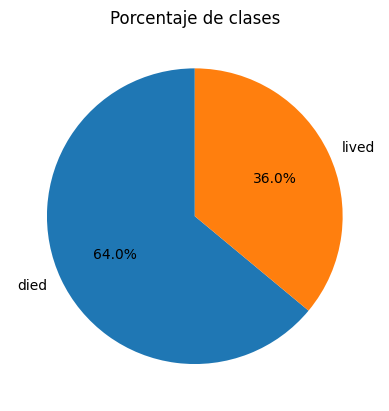

In [31]:
# veamos la columna 'resultado que es nuestro target
import matplotlib.pyplot as plt
resultado_vc = df_horse_completado['resultado'].value_counts()

fig, ax = plt.subplots()

# Genera el gráfico circular
ax.pie(resultado_vc, labels=resultado_vc.index, autopct='%1.1f%%', startangle=90)

ax.set_title('Porcentaje de clases')


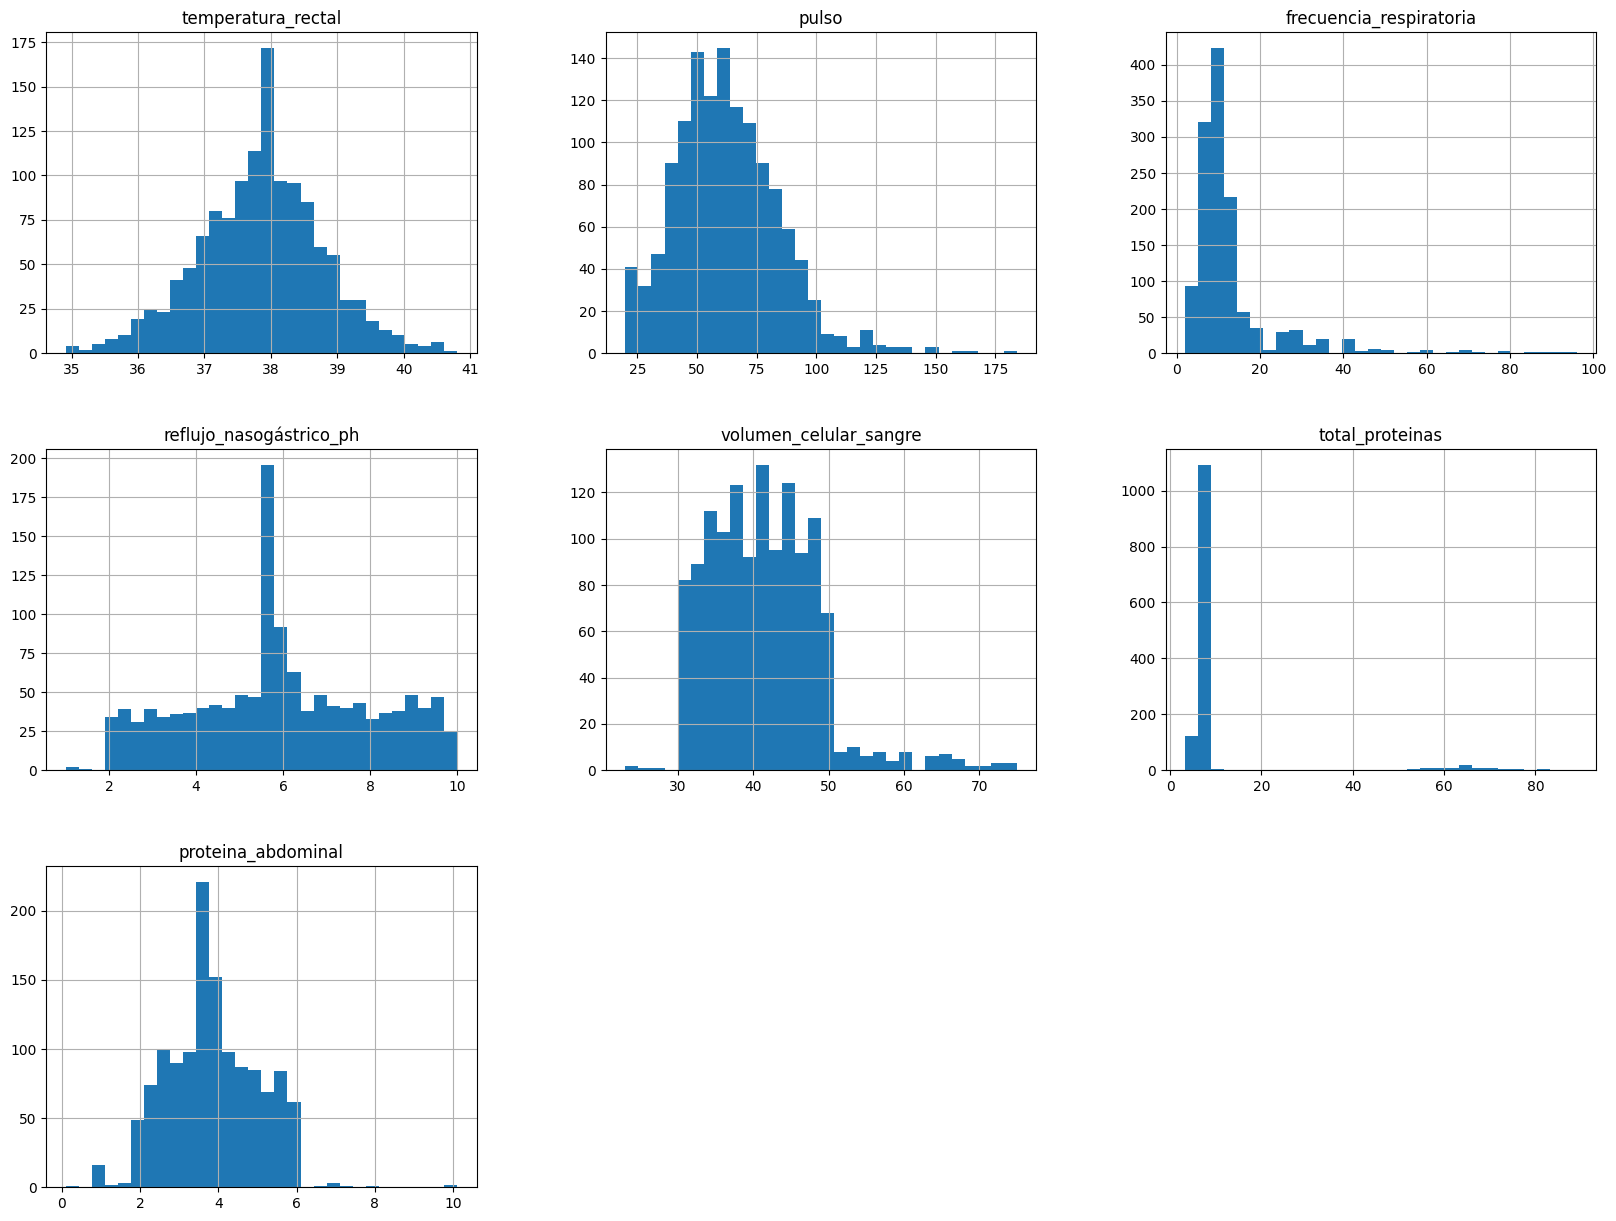

In [32]:
#Distribución de valores de las columnas numéricas

df_h_numericasC.hist(bins=30, figsize=(20, 15))
plt.show()

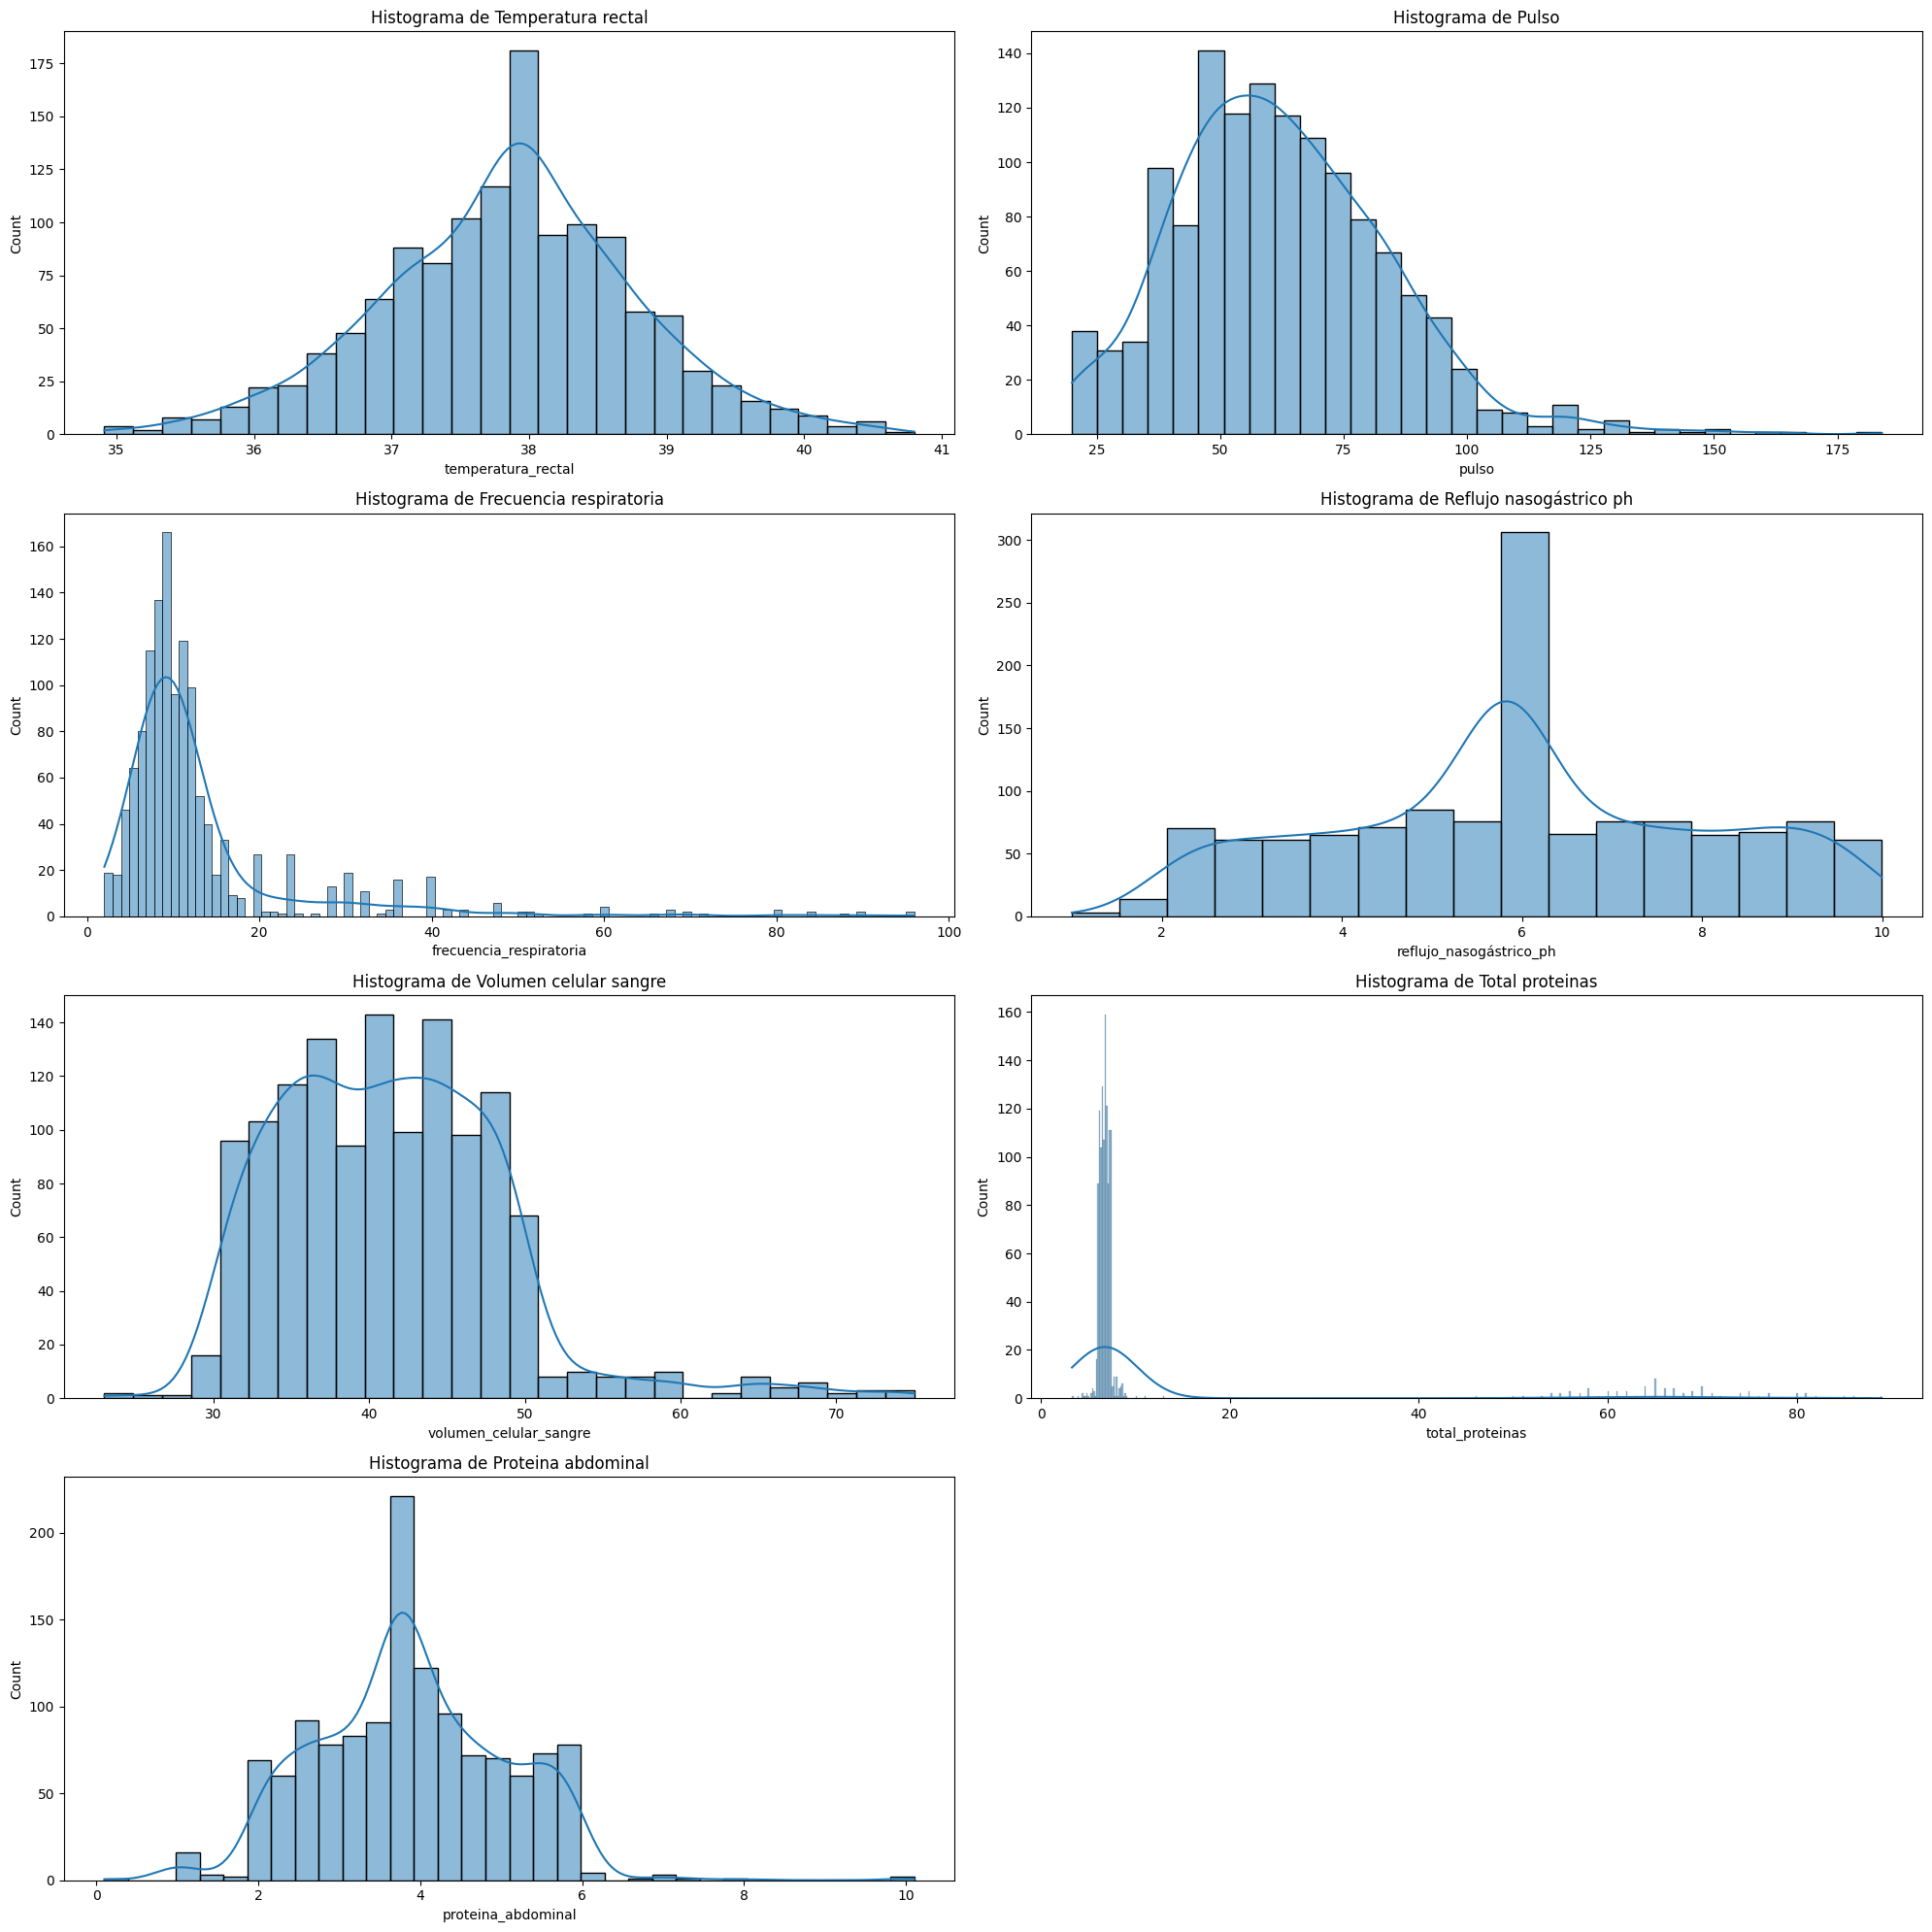

In [33]:
import seaborn as sns

variables = df_h_numericasC.columns

n_variables = len(variables)
n_rows = 4
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))


for i, var in enumerate(variables):
    sns.histplot(data=df_h_numericasC, x=var, kde=True, ax=axs[i // n_cols, i % n_cols])
    axs[i // n_cols, i % n_cols].set_title(f'Histograma de {var.replace("_", " ").capitalize()}')

# Si hay subplots vacíos (cuando n_variables < n_rows * n_cols), ocultarlos
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j // n_cols, j % n_cols])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

plt.show()

In [34]:
df_h_numericasC.describe()

temperatura_rectal        pulso  frecuencia_respiratoria  \
count         1299.000000  1299.000000              1299.000000   
mean            37.848926    62.462723                13.051811   
std              0.930834    21.901883                11.562518   
min             34.911729    20.000000                 2.000000   
25%             37.252526    47.674404                 7.521124   
50%             37.883347    60.027593                 9.732633   
75%             38.429019    75.861042                12.758557   
max             40.800000   184.000000                96.000000   

       reflujo_nasogástrico_ph  volumen_celular_sangre  total_proteinas  \
count              1299.000000             1299.000000      1299.000000   
mean                  5.955681               41.365618        10.345752   
std                   2.071485                7.391322        14.248197   
min                   1.000000               23.000000         3.300000   
25%                   4.517213               35.729307         6.421863   
50%                   5.798477               41.000000         6.808443   
75%                   7.500000               46.000000         7.242568   
max                   9.997386               75.000000        89.000000   

       proteina_abdominal  
count         1299.000000  
mean             3.881556  
std              1.164990  
min              0.100000  
25%              3.070359  
50%              3.742145  
75%              4.679458  
max             10.100000

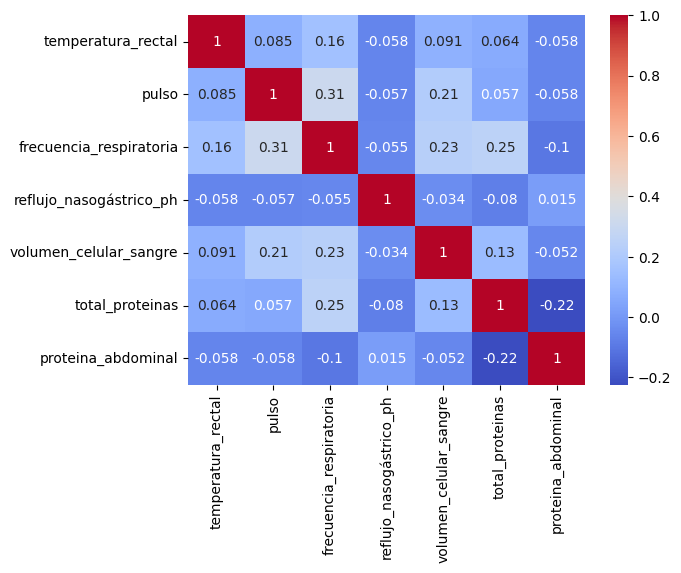

In [35]:
#Gráfico de calor para ver las correlaciones entre las variables numéricas
import seaborn as sns

sns.heatmap(df_h_numericasC.corr(), annot=True, cmap='coolwarm')
plt.show()

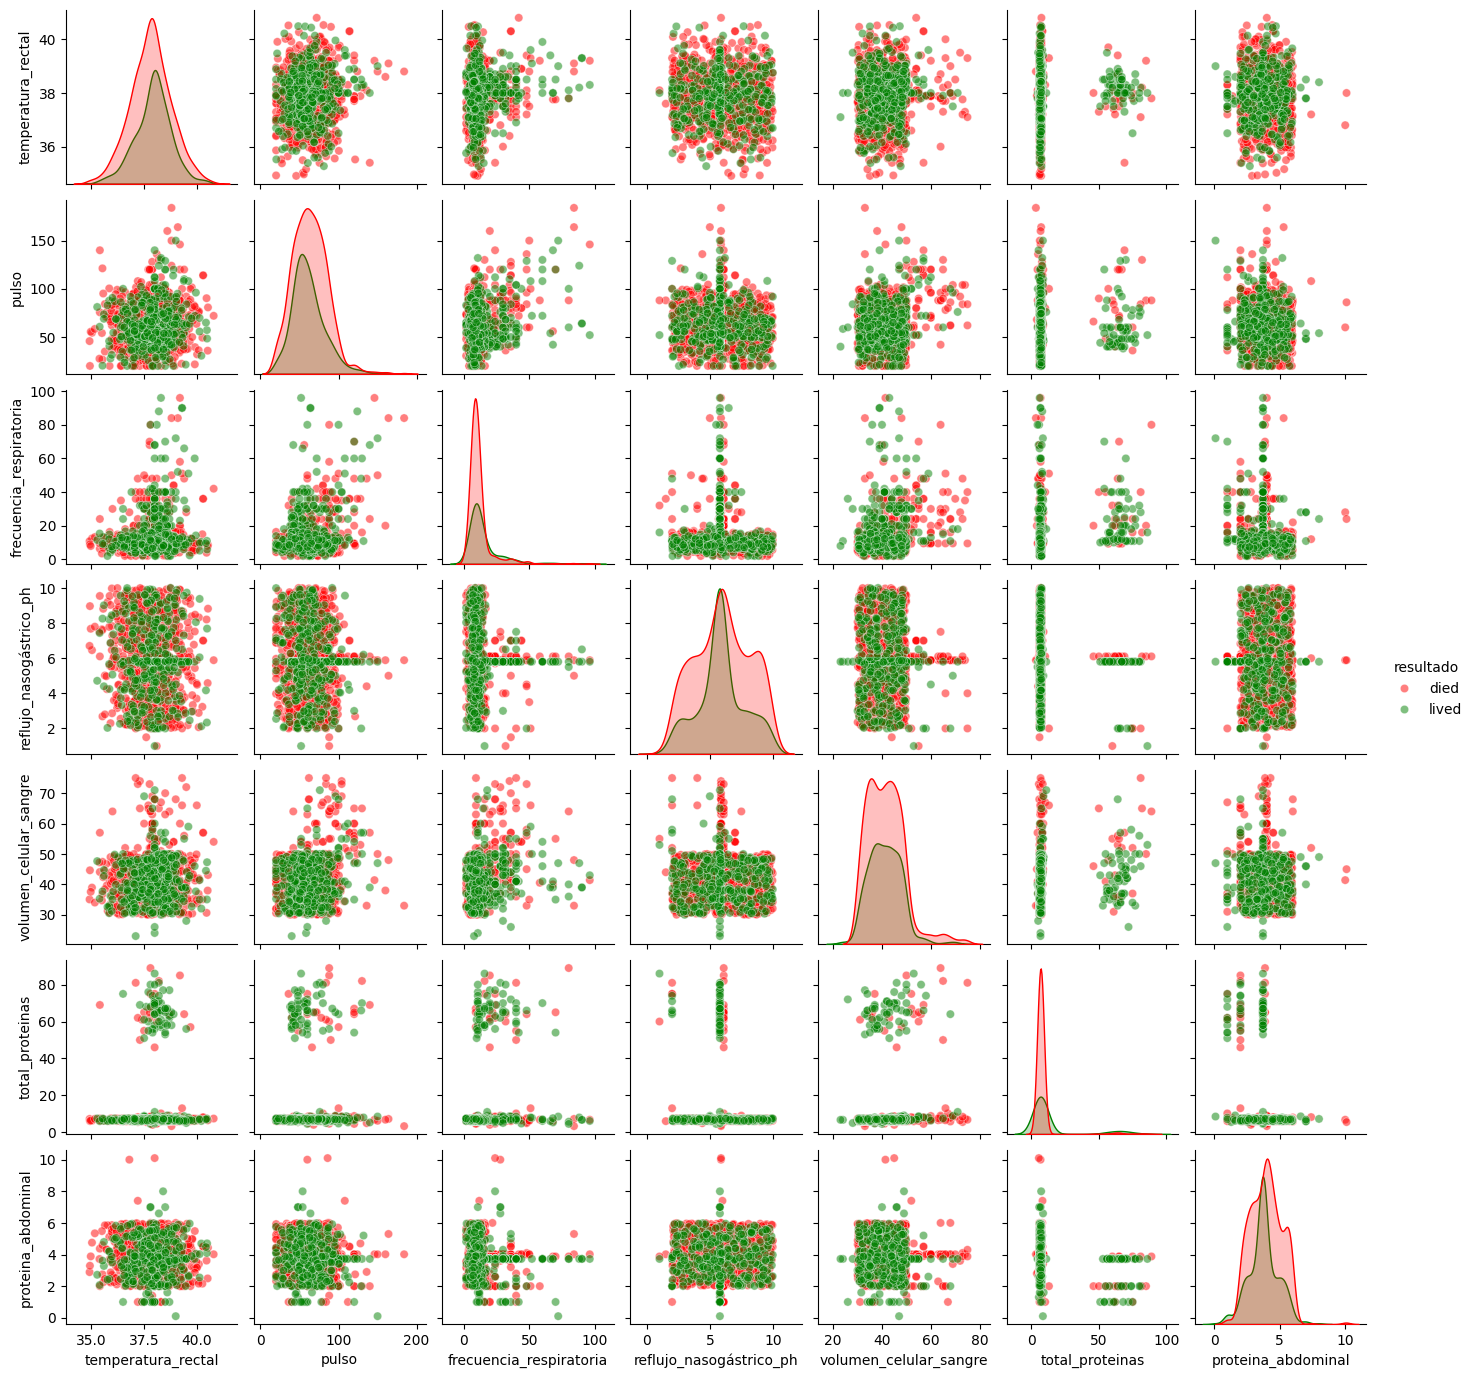

In [36]:
#Gráfico de dispersión de las columnas numéricas según la variable 'resultado'

# Seleccionamos solo las columnas numéricas continuas
df_numericas = df_horse_completado.select_dtypes(include='float64')

# Añadimos la columna categórica 'resultado' al DataFrame filtrado
df_numericas['resultado'] = df_horse_completado['resultado']

# Ahora hacemos el pairplot

sns.pairplot(df_numericas, hue='resultado', palette={'lived': 'green', 'died': 'red'}, height=2, plot_kws={'alpha':0.5})
plt.show()


In [37]:
#Gráfico de dispersión entre par de variables numéricas
sns.pairplot(df_h_numericasC)
plt.show()

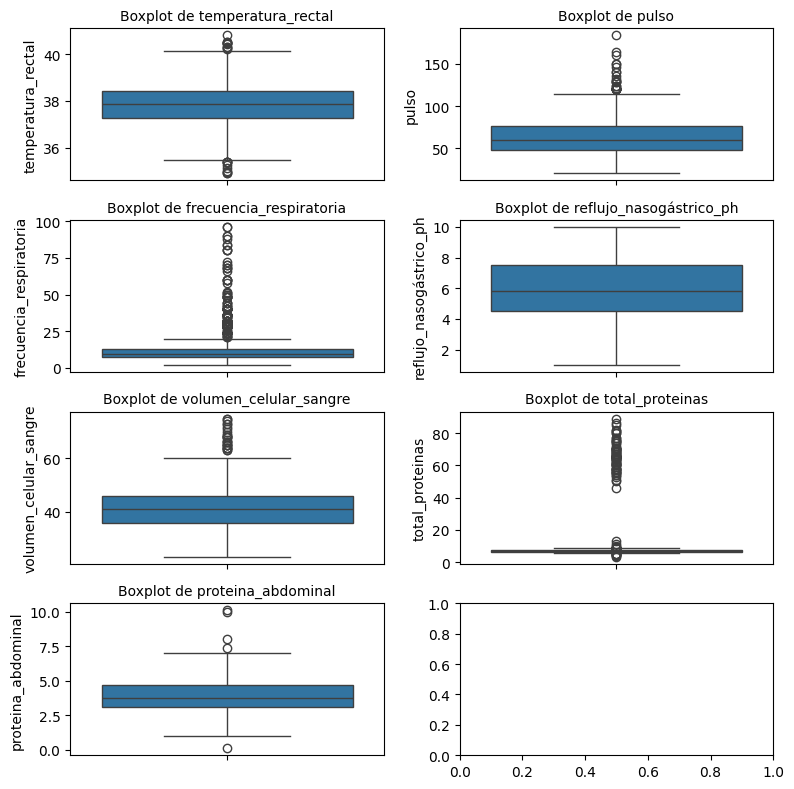

In [38]:
#Visualización de outleirs

variables = df_h_numericasC.columns
n_variables = len(variables)
n_rows = 4
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 8))
axs = axs.flatten()  # Convertir el array de ejes en una lista para facilitar la indexación

for i, col in enumerate(variables):
    if i < len(axs):
        sns.boxplot(data=df_h_numericasC[col], ax=axs[i])
        axs[i].set_title(f'Boxplot de {col}', fontsize=10)
        axs[i].tick_params(axis='x', labelrotation=45)

    else:
        fig.delaxes(axs[i])  # Eliminar ejes si hay más subgráficos que variables

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

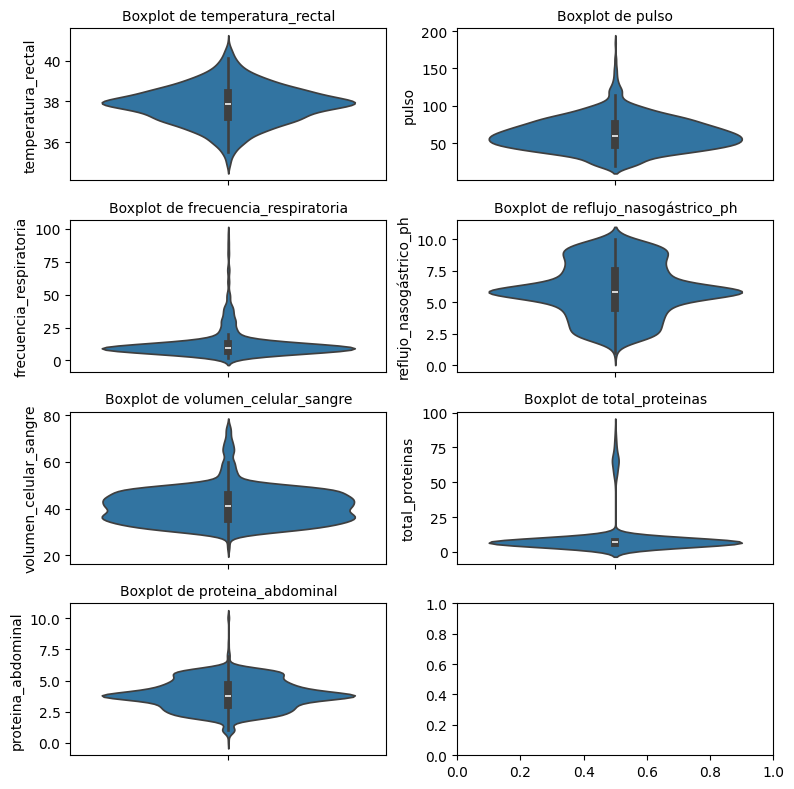

In [39]:
variables = df_h_numericasC.columns
n_variables = len(variables)
n_rows = 4
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(8, 8))  # Ajustar el tamaño del gráfico
axs = axs.flatten()  # Convertir el array de ejes en una lista para facilitar la indexación

for i, col in enumerate(variables):
    if i < len(axs):
        sns.violinplot(data=df_h_numericasC[col], ax=axs[i])
        axs[i].set_title(f'Boxplot de {col}', fontsize=10)
        axs[i].tick_params(axis='x', labelrotation=45)

    else:
        fig.delaxes(axs[i])  # Eliminar ejes si hay más subgráficos que variables

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

In [40]:
#IQR (Radio Inter Quartil)

from scipy.stats import iqr

def calcular_iqr(df):
    iqr_dict = {}
    for col in df.columns:
        # Calcular el IQR usando scipy.stats.iqr
        IQR = iqr(df[col].dropna())  # dropna() para manejar posibles valores nulos
        iqr_dict[col] = IQR
    return iqr_dict

# Obtener el IQR para todas las columnas en df_h_numericasC
iqr_dict = calcular_iqr(df_h_numericasC)

median_value = df_h_numericasC[col].median()

for col, iqr_value in iqr_dict.items():
    print(f'IQR de {col}: {iqr_value}, Mediana de {col}: {median_value}')

IQR de temperatura_rectal: 1.176492942031878, Mediana de temperatura_rectal: 3.742144973676666
IQR de pulso: 28.186638402353275, Mediana de pulso: 3.742144973676666
IQR de frecuencia_respiratoria: 5.23743333137808, Mediana de frecuencia_respiratoria: 3.742144973676666
IQR de reflujo_nasogástrico_ph: 2.9827872162957476, Mediana de reflujo_nasogástrico_ph: 3.742144973676666
IQR de volumen_celular_sangre: 10.270693348368127, Mediana de volumen_celular_sangre: 3.742144973676666
IQR de total_proteinas: 0.820705492698858, Mediana de total_proteinas: 3.742144973676666
IQR de proteina_abdominal: 1.6090984347903885, Mediana de proteina_abdominal: 3.742144973676666


In [41]:
Q1 = df_horse_completado['pulso'].quantile(0.25)
Q3 = df_horse_completado['pulso'].quantile(0.75)
IQR = Q3 - Q1

In [42]:
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

In [43]:
#Identificamos cuantos son los outliers en la columna 'pulso'

outliers_pulso = df_horse_completado[(df_horse_completado['pulso'] < umbral_inferior) | (df_horse_completado['pulso'] > umbral_superior)]
outliers_pulso

cirugía   edad  número_hospital  temperatura_rectal       pulso  \
1       yes  young          5290409           39.100000  164.000000   
6       yes  young          5301219           37.883347  128.000000   
9       yes  young          5277409           39.200000  146.000000   
11       no  adult           529827           37.883347  120.000000   
15      yes  young          5282839           38.600000  160.000000   
37      yes  young          5287179           38.100000  136.000000   
40      yes  adult           530402           37.883347  120.000000   
56      yes  adult           528503           39.200000  120.000000   
64      yes  young          5291719           38.800000  124.000000   
65      yes  young          5294539           38.800000  184.000000   
70      yes  adult           528638           37.700000  120.000000   
71      yes  young          5297159           38.800000  150.000000   
438     yes  adult           534069           37.759371  120.000000   
439     yes  adult           535407           35.400000  140.000000   
441      no  adult           534293           38.200000  130.000000   
455     yes  adult           534925           39.400000  120.000000   
474     yes  adult           533886           37.759371  120.000000   
655     yes  adult           368512           35.523009  121.238939   
845     yes  young           534998           38.300000  130.000000   
856      no  young          5288249           39.000000  150.000000   
891     yes  young          5292489           38.000000  140.000000   
916     yes  adult           529272           38.300000  132.000000   
933     yes  adult           535292           38.500000  129.000000   
940     yes  adult           534833           38.500000  120.000000   
957     yes  young          5294369           38.900000  120.000000   
970     yes  young           534597           38.500000  120.000000   
979     yes  young          5291409           38.200000  124.000000   

     frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
1                  84.000000                 cold           normal   
6                  36.000000                 cool          reduced   
9                  96.000000                 cool          reduced   
11                  9.459724                 cold          reduced   
15                 20.000000                 cool          reduced   
37                 48.000000                 cool          reduced   
40                  9.459724                 cold          reduced   
56                 20.000000                 cold          reduced   
64                 36.000000                 cool           normal   
65                 84.000000               normal          reduced   
70                 28.000000                 cool          reduced   
71                 50.000000               normal          reduced   
438                 9.284530                 cool           absent   
439                24.000000                 cool          reduced   
441                16.000000                 cold          reduced   
455                48.000000                 cool          reduced   
474                70.000000                 cold          reduced   
655                 8.134823                 cold           absent   
845                60.000000                 cool          reduced   
856                72.000000                 cool          reduced   
891                68.000000               normal           normal   
916                10.890446                 cool          reduced   
933                48.000000                 cool          reduced   
940                60.000000                 cold          reduced   
957                30.000000               normal          reduced   
970                70.000000                 cool          reduced   
979                88.000000               normal          reduced   

    membrana_mucosa tiempo_rellenado_capilar  ... volu

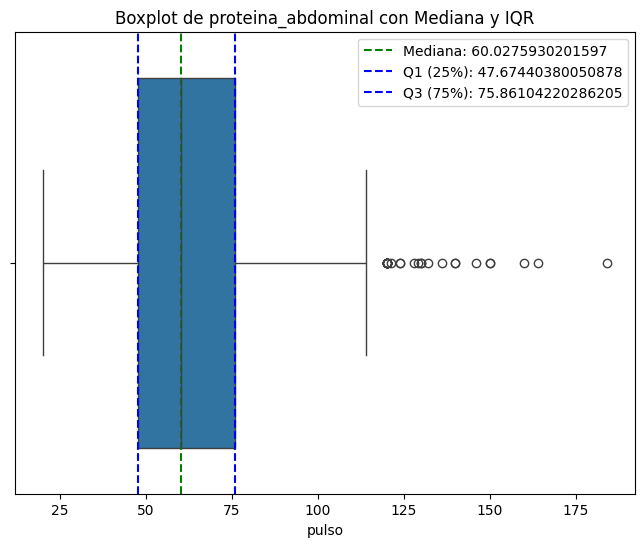

In [44]:
#Observamos mas de serca el gráfico de boxplot de la columna 'pulso' porque puede presentar valor imposibles

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la mediana y los límites del IQR
median_value = df_h_numericasC['pulso'].median()
q1 = df_h_numericasC['pulso'].quantile(0.25)  # Primer cuartil
q3 = df_h_numericasC['pulso'].quantile(0.75)  # Tercer cuartil
iqr_value = q3 - q1


plt.figure(figsize=(8, 6))
sns.boxplot(x=df_h_numericasC['pulso'])

# Resaltar la mediana con una línea
plt.axvline(median_value, color='green', linestyle='--', label=f'Mediana: {median_value}')

# Resaltar el IQR
plt.axvline(q1, color='blue', linestyle='--', label=f'Q1 (25%): {q1}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3 (75%): {q3}')


plt.legend()
plt.title(f'Boxplot de {col} con Mediana y IQR')
plt.show()


In [45]:
df_horse_completado['tiempo_rellenado_capilar'].value_counts()

tiempo_rellenado_capilar
less_3_sec    742
more_3_sec    555
3               2
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


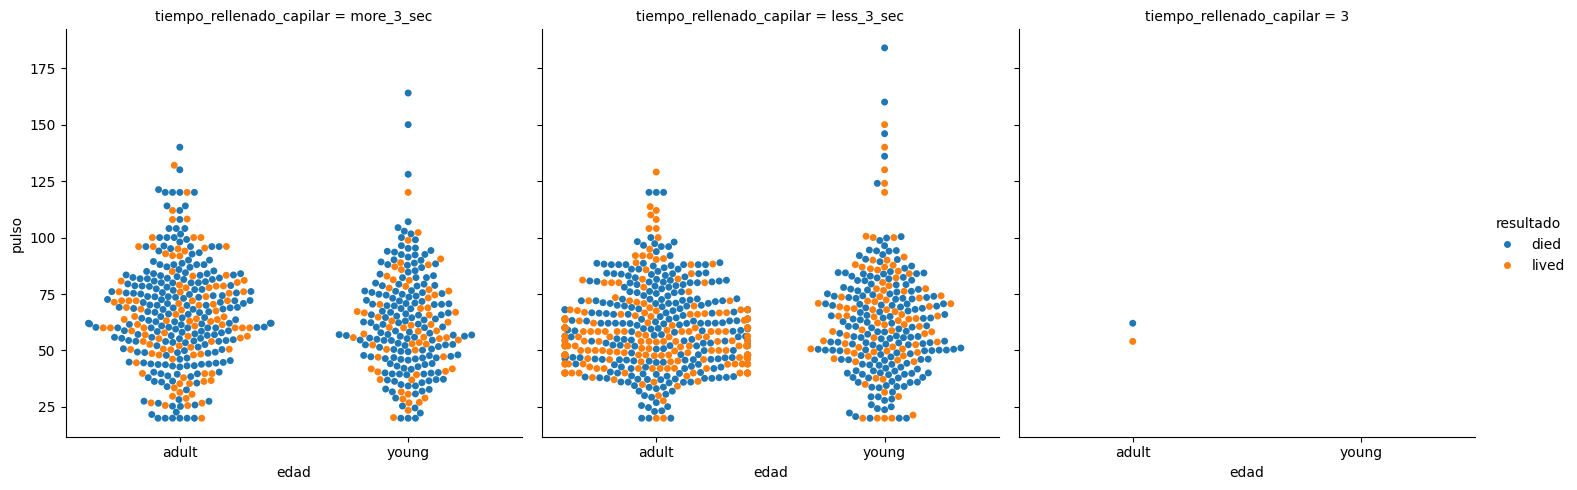

In [46]:

#Gráfico de enjambre para ver la distribución y la dispersión de los dato según la variable target

sns.catplot (x='edad', y='pulso', hue='resultado', col='tiempo_rellenado_capilar', kind='swarm', data=df_horse_completado)

plt.show()


In [47]:
#Creación de columna categorica de pulso, para los valores />= 30 y <= 40 = pulso normal /,/>= 20 y <= 30= pulso atlético/ y /> 40 y < 20 = shock/
import numpy as np
condiciones = [
    (df_horse_completado['pulso'] >= 30) & (df_horse_completado['pulso'] <= 40),  # Pulso normal
    (df_horse_completado['pulso'] >= 20) & (df_horse_completado['pulso'] < 30),  # Pulso atlético
    (df_horse_completado['pulso'] > 40) | (df_horse_completado['pulso'] < 20)     # Shock
]

# Definir los valores correspondientes para cada condición
valores = ['normal', 'atletico', 'shock']

# Crear la nueva columna con np.select
df_horse_completado['categoria_pulso'] = np.select(condiciones, valores, default='shock')

# Verificar el resultado
print(df_horse_completado[['pulso', 'categoria_pulso']].head())


   pulso categoria_pulso
0   66.0           shock
1  164.0           shock
2  104.0           shock
3   60.0           shock
4   92.0           shock


In [48]:
df_horse_completado['categoria_pulso'].value_counts()


categoria_pulso
shock       1106
normal       126
atletico      67
Name: count, dtype: int64

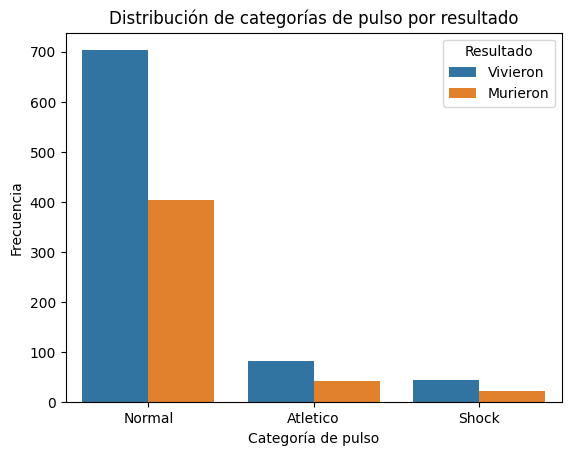

In [49]:
#Observamos la distribución de los que viven y mueren en un grafico de barras según el tipo de pulso
sns.countplot(data=df_horse_completado, x='categoria_pulso', hue='resultado')
plt.xlabel('Categoría de pulso')
plt.xticks([0,1,2],["Normal", "Atletico", "Shock"])
new_labels = ['Vivieron', 'Murieron']
leg = plt.legend(title='Resultado')
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.ylabel('Frecuencia')
plt.title('Distribución de categorías de pulso por resultado')
plt.show()

In [50]:
#Eliminar columna 'pulso' para evitar la colinealidad

df_horse_completado.drop('pulso', axis=1, inplace=True)
df_horse_completado.head()

cirugía   edad  número_hospital  temperatura_rectal  \
0      no  adult           530101           38.500000   
1     yes  young          5290409           39.100000   
2      no  adult           530255           37.300000   
3     yes  adult           529607           37.883347   
4      no  young          5291329           38.000000   

   frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
0                28.000000                 cool          reduced   
1                84.000000                 cold           normal   
2                35.000000                 cool          reduced   
3                 9.459724                 cool          reduced   
4                28.000000               normal           normal   

  membrana_mucosa tiempo_rellenado_capilar         dolor  ... total_proteinas  \
0     bright_pink               more_3_sec  extreme_pain  ...             8.4   
1   dark_cyanotic               more_3_sec     depressed  ...             7.2   
2   dark_cyanotic               more_3_sec     depressed  ...             7.4   
3     bright_pink               less_3_sec     depressed  ...             8.3   
4     bright_pink               less_3_sec         alert  ...             6.1   

  apariencia_abdominal proteina_abdominal resultado  lesión_quirúrgica  \
0                clear           4.015887      died                 no   
1        serosanguious           5.300000      died                yes   
2                clear           4.015887      died                 no   
3                clear           4.015887      died                yes   
4                clear           4.015887      died                 no   

  lesión_1 lesión_2  lesión_3  datos_patológicos categoria_pulso  
0    11300        0         0                 no           shock  
1     2208        0         0                yes           shock  
2     4300        0         0                 no           shock  
3     2208        0         0                 no           shock  
4        0        0         0                yes           shock  

[5 rows x 28 columns]

<ipython-input-51-0002a4eb07db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_horse_completado, x='resultado', palette={'lived': 'green', 'died': 'red'})


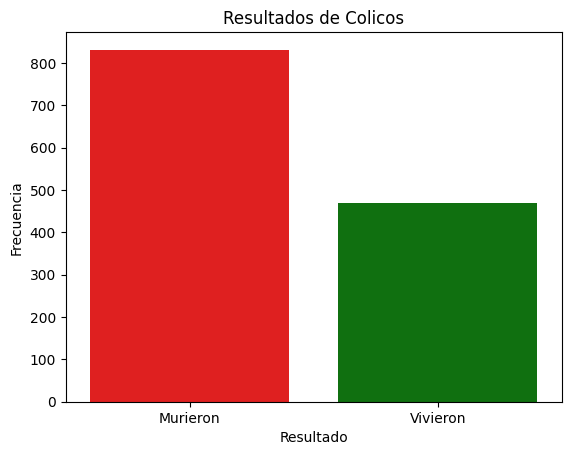

In [51]:
#Frecuencia de la variable target
sns.countplot(data=df_horse_completado, x='resultado', palette={'lived': 'green', 'died': 'red'})
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.xticks ([0,1],["Murieron", "Vivieron"])
plt.title("Resultados de Colicos")
plt.show()

**Conclusiones**



*   Se discretizaron variables categoricas de numericas en un tolist.() y en 3 dataframe de 'categoricas'
 (df_h_categoricas), 'numericas continuas' (df_h_numericasC) y 'numericas discretas'(df_h_numericasD), para su facil manipulacion.
*Se puede observar la asimetria de las variables en los gráficos de histplot, con la distribucion normal (Gaussiana) en la variable de 'temperatura_rectal', sesgada positiva en 'pulso' y 'frecuencia_respiratoria', distribucion de pareto de larga cola en la variable 'total_proteinas', la variable 'reflujo_nasogastrico_ph' se ve una distribución pareja con un pico, y en las variables de 'proteina_abdominal' y 'volumen_celular_sangre' distribuciones totalmente asimétricas.
*Los graficos de dispersion entre variables numericas continuas y tambien divido por la variable target ('resultado') mostraron que no hay relacion lineal entre variables, se pueden observar algunos agrupamientos.
* Se puede observar en los graficos de boxplot y violinplot la presencia de datos outleirs y su distribusion, los cuales se eliminaron 27 datos por estar por encima del umbral superior y por debajo del umbral inferior del IQR, fueron evaluados con el criterio de la columna pulso dispuesta en la información de atributos y considerados imposibles. Dado que se consta de la agregación de datos sintetizados se considero una eliminarlos por ser considerados pocos y beneficioso para mejorar el funsionamiento de los modelos de machine learning.
*La variable target presenta un desbalanceo de clase, siendo el doble practicamente a favor de la clase 'died'.
*En el gráfico de enjambre se puede observar que son mas los adultos que presentan  'more_3_secon' de rellenado capilar. Lo que nos indica segun la documentacion problemas en el sistema circulatorio, y se puede observar que son mas los que mueren tanto adultos como en jovenes cuando superan los 3 segundos de rellenado capilar.



# Test Chi Cuadrado


In [52]:
import pandas as pd
from scipy.stats import chi2_contingency

# Seleccionar solo las columnas categóricas del DataFrame
categorical_columns = df_horse_completado.select_dtypes(include=['object']).columns

# Crear una función para aplicar chi-cuadrado a dos variables
def chi2_test(var1, var2):
    contingency_table = pd.crosstab(df_horse_completado[var1], df_horse_completado[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Aplicar el test de chi-cuadrado para cada par de variables categóricas
results = []
seen_pairs = set()  # Usar un conjunto para registrar pares ya vistos

for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:  # Solo evaluar una vez para cada par, evitando repeticiones
            pair = (col1, col2)  # Guardar el par en el orden original
            if pair not in seen_pairs:
                p_value = chi2_test(col1, col2)
                results.append({'Variable1': col1, 'Variable2': col2, 'p-valor': p_value})
                seen_pairs.add(pair)

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(results)

# Filtrar solo las relaciones significativas
df_significant_results = df_results[df_results['p-valor'] < 0.05]

# Mostrar el DataFrame con los resultados significativos
print(df_significant_results)


                Variable1             Variable2   p-valor
2                 cirugía      pulso_periférico  0.005885
5                 cirugía                 dolor  0.000075
6                 cirugía         peristaltismo  0.002655
9                 cirugía  reflujo_nasogástrico  0.032668
11                cirugía               abdomen  0.000006
..                    ...                   ...       ...
139               abdomen             resultado  0.000136
140               abdomen     lesión_quirúrgica  0.000001
142               abdomen       categoria_pulso  0.025871
143  apariencia_abdominal             resultado  0.000062
145  apariencia_abdominal     datos_patológicos  0.000004

[98 rows x 3 columns]


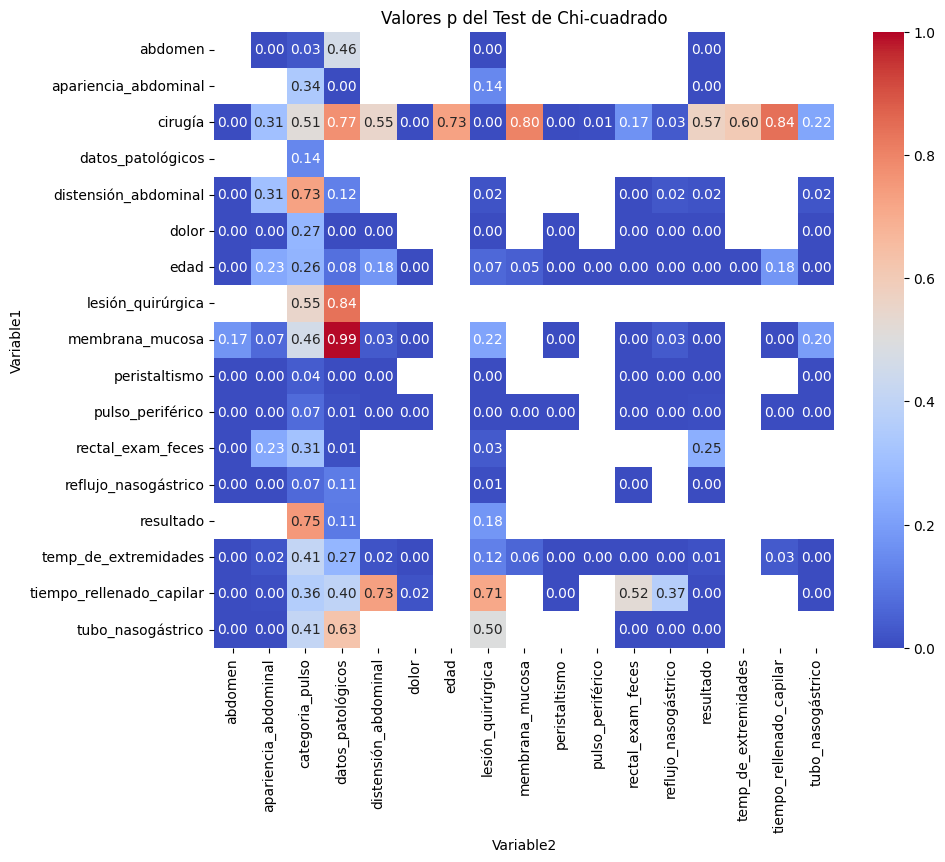

In [53]:
#Gráfico Heatmap de Chi Cuadrado
#Se puede observar en el grafico las correlaciones determinadas por el test del chi cuadrado
#Se muestran datos '0.00' porque los pares duplicados fueron eliminados

p_values = df_results[['p-valor']]

p_values = p_values.astype(float)

heatmap_data = df_results.pivot(index='Variable1', columns='Variable2', values='p-valor')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', vmin=0, vmax=1)
plt.title('Valores p del Test de Chi-cuadrado')
plt.show()


# **Coheficiente de Pearson**

In [54]:

from scipy.stats import pearsonr


# Lista para almacenar los resultados
resultados_list = []


columnas = df_h_numericasC.columns

# Calcular el coeficiente de Pearson y el p-valor para cada combinación de columnas
for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        col1 = columnas[i]
        col2 = columnas[j]

        # Obtener las series de datos
        serie1 = df_h_numericasC[col1]
        serie2 = df_h_numericasC[col2]

        # Calcular el coeficiente de Pearson y el p-valor
        coef_pearson, p_valor = pearsonr(serie1, serie2)

        # Almacenar los resultados en la lista
        resultados_list.append({
            'Columna_1': col1,
            'Columna_2': col2,
            'Coef_Pearson': coef_pearson,
            'P_valor': p_valor
        })

# Crear el DataFrame con los resultados
resultados = pd.DataFrame(resultados_list)

# Imprimir el DataFrame para verificar
print(resultados)


                  Columna_1                Columna_2  Coef_Pearson  \
0        temperatura_rectal                    pulso      0.085340   
1        temperatura_rectal  frecuencia_respiratoria      0.155742   
2        temperatura_rectal  reflujo_nasogástrico_ph     -0.057640   
3        temperatura_rectal   volumen_celular_sangre      0.091124   
4        temperatura_rectal          total_proteinas      0.063758   
5        temperatura_rectal       proteina_abdominal     -0.058316   
6                     pulso  frecuencia_respiratoria      0.310278   
7                     pulso  reflujo_nasogástrico_ph     -0.057334   
8                     pulso   volumen_celular_sangre      0.212110   
9                     pulso          total_proteinas      0.056620   
10                    pulso       proteina_abdominal     -0.058029   
11  frecuencia_respiratoria  reflujo_nasogástrico_ph     -0.054942   
12  frecuencia_respiratoria   volumen_celular_sangre      0.231503   
13  frecuencia_respi

#Isolation Forest

In [55]:

from sklearn.ensemble import IsolationForest


numerical_columns = df_horse_completado.select_dtypes(include=['float64', 'int64']).columns

# Crear el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Ajusta 'contamination' según tus necesidades

# Ajustar el modelo
iso_forest.fit(df_horse_completado[numerical_columns])

# Predecir anomalías (-1 para anomalías, 1 para normales)
anomalies = iso_forest.predict(df_horse_completado[numerical_columns])

# Agregar la columna de anomalías al DataFrame
df_horse_completado['anomaly'] = anomalies

# Filtrar los datos para ver las anomalías
anomaly_data = df_horse_completado[df_horse_completado['anomaly'] == -1]

print("Datos anómalos detectados:")
print(anomaly_data)


Datos anómalos detectados:
     cirugía   edad  número_hospital  temperatura_rectal  \
1        yes  young          5290409           39.100000   
6        yes  young          5301219           37.883347   
9        yes  young          5277409           39.200000   
13        no  adult           529642           37.200000   
25       yes  adult          5279822           38.000000   
...      ...    ...              ...                 ...   
1053      no  adult           910694           39.522129   
1087      no  adult           294692           39.661316   
1111      no  adult           882239           40.214791   
1139      no  adult           106154           39.057060   
1216     yes  adult           313567           35.761039   

      frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
1                   84.000000                 cold           normal   
6                   36.000000                 cool          reduced   
9                   96.000000          

In [56]:
# Filtrar los datos normales y eliminar la columna 'anomaly'
df_horse_sin_anomalias= df_horse_completado[df_horse_completado['anomaly'] == 1].drop(columns=['anomaly'])

print("DataFrame sin anomalías y sin la columna 'anomaly':")
print(df_horse_sin_anomalias.head())


DataFrame sin anomalías y sin la columna 'anomaly':
  cirugía   edad  número_hospital  temperatura_rectal  \
0      no  adult           530101           38.500000   
2      no  adult           530255           37.300000   
3     yes  adult           529607           37.883347   
4      no  young          5291329           38.000000   
5     yes  adult           530233           37.600000   

   frecuencia_respiratoria temp_de_extremidades pulso_periférico  \
0                28.000000                 cool          reduced   
2                35.000000                 cool          reduced   
3                 9.459724                 cool          reduced   
4                28.000000               normal           normal   
5                48.000000                 cool           normal   

  membrana_mucosa tiempo_rellenado_capilar         dolor  ... total_proteinas  \
0     bright_pink               more_3_sec  extreme_pain  ...             8.4   
2   dark_cyanotic               mo

In [57]:
# Eliminar filas que contienen valores NaN
df_horse_sin_anomalias.dropna(inplace=True)

print("Cantidad de NaNs en el DataFrame sin anomalías:", df_horse_sin_anomalias.isnull().sum().sum())


Cantidad de NaNs en el DataFrame sin anomalías: 0


# MSA

Se utiliza principalmente para la reducción de dimensionalidad y la exploración de datos categóricos. Se puede observar que variables categoricas tienen mas peso en el modelado

In [58]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 7.7 MB/s eta 0:00:00


In [59]:
from prince import MCA

mca = MCA(n_components=2)
mca.fit(df_h_categoricas)

mca_results = mca.transform(df_h_categoricas)
mca_results

0         1
0     0.655893 -0.565721
1    -0.089862 -0.410330
2     0.432102 -0.406872
3     0.791956 -0.262873
4     0.424939  0.431110
...        ...       ...
1294 -0.326594 -0.038300
1295 -0.159512  0.466256
1296 -0.046581 -0.052174
1297 -0.254516  0.036006
1298 -0.121802  0.404347

[1299 rows x 2 columns]

In [60]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.179         6.33%                      6.33%
1              0.124         4.40%                     10.74%

In [61]:

column_contributions = mca.column_contributions_

category_names = pd.get_dummies(df_h_categoricas).columns

column_contributions.index = category_names

column_contributions_percent = column_contributions * 100

# Ordenar las contribuciones de mayor a menor para el primer componente
sorted_contributions = column_contributions_percent.iloc[:, 0].sort_values(ascending=False)


sorted_contributions.head(30).to_frame().style.format('{:.2f}%')


# OneHotEncoder / Encoding de variables categoricas

In [62]:
from sklearn.preprocessing import OneHotEncoder


columnas_categoricas = df_horse_completado.select_dtypes(include=['object']).columns

# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar OneHotEncoder y transformar a un DataFrame
df_encoded = pd.DataFrame(encoder.fit_transform(df_horse_completado[columnas_categoricas]))

# Renombrar las columnas para reflejar las categorías originales
df_encoded.columns = encoder.get_feature_names_out(columnas_categoricas)

# Concatenar el DataFrame codificado con las otras columnas no categóricas
df_horse_encoded = pd.concat([df_horse_completado.drop(columnas_categoricas, axis=1), df_encoded], axis=1)

# Ver el resultado
print(df_horse_encoded.head())


   número_hospital  temperatura_rectal  frecuencia_respiratoria  \
0           530101           38.500000                28.000000   
1          5290409           39.100000                84.000000   
2           530255           37.300000                35.000000   
3           529607           37.883347                 9.459724   
4          5291329           38.000000                28.000000   

   reflujo_nasogástrico_ph  volumen_celular_sangre  total_proteinas  \
0                 5.885547                    45.0              8.4   
1                 5.000000                    48.0              7.2   
2                 5.885547                    74.0              7.4   
3                 5.885547                    44.0              8.3   
4                 7.200000                    37.0              6.1   

   proteina_abdominal  lesión_1  lesión_2  lesión_3  ...  abdomen_firm  \
0            4.015887     11300         0         0  ...           0.0   
1            5.300000 

In [63]:
columnas_categoricas2 = df_horse_sin_anomalias.select_dtypes(include=['object']).columns

# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar OneHotEncoder y transformar a un DataFrame
df_encoded = pd.DataFrame(encoder.fit_transform(df_horse_sin_anomalias[columnas_categoricas2]))

# Renombrar las columnas para reflejar las categorías originales
df_encoded.columns = encoder.get_feature_names_out(columnas_categoricas2)

# Concatenar el DataFrame codificado con las otras columnas no categóricas
df_horse_encoded2 = pd.concat([df_horse_completado.drop(columnas_categoricas2, axis=1), df_encoded], axis=1)

# Ver el resultado
print(df_horse_encoded2.head())


   número_hospital  temperatura_rectal  frecuencia_respiratoria  \
0           530101           38.500000                28.000000   
1          5290409           39.100000                84.000000   
2           530255           37.300000                35.000000   
3           529607           37.883347                 9.459724   
4          5291329           38.000000                28.000000   

   reflujo_nasogástrico_ph  volumen_celular_sangre  total_proteinas  \
0                 5.885547                    45.0              8.4   
1                 5.000000                    48.0              7.2   
2                 5.885547                    74.0              7.4   
3                 5.885547                    44.0              8.3   
4                 7.200000                    37.0              6.1   

   proteina_abdominal  lesión_1  lesión_2  lesión_3  ...  abdomen_firm  \
0            4.015887     11300         0         0  ...           0.0   
1            5.300000 

# Coeficiente Biserial

El coeficiente de correlación biserial es una medida estadística utilizada para evaluar la relación entre una variable númerica continua y una variable binaria (dicotómica). Su propósito es determinar la fuerza y dirección de la relación entre estas dos variables.



Hipótesis nula: No existe correlación entre una variable dicotómica y una variable métrica.

Hipótesis alternativa: Existe correlación entre una variable dicotómica y una variable métrica.

Una p < 0,05 significa que la hipótesis nula es rechazada y una p > 0,05 que la hipótesis nula es verdadera

In [64]:

import scipy.stats as stats

# Lista de variables continuas
variables_continuas = [
    'temperatura_rectal',
    'frecuencia_respiratoria',
    'reflujo_nasogástrico_ph',
    'volumen_celular_sangre',
    'total_proteinas',
    'proteina_abdominal',
    'número_hospital',
    'lesión_1',
    'lesión_2',
    'lesión_3'
]

# Crear listas para almacenar resultados
variables = []
coeficientes = []
p_valores = []
hipotesis_nula = []

# Iterar sobre las variables continuas y calcular el coeficiente y el p-valor
for variable in variables_continuas:
    coeficiente, p_valor = stats.pointbiserialr(df_horse_encoded[variable], df_horse_encoded["resultado_lived"])

    # Almacenar resultados
    variables.append(variable)
    coeficientes.append(coeficiente)
    p_valores.append(p_valor)

    # Evaluar si rechazamos o no la hipótesis nula
    if coeficiente < 0.05:
        hipotesis_nula.append('Rechazada (p < 0.05)')
    else:
        hipotesis_nula.append('Aceptada (p > 0.05)')

# Crear el DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Variable': variables,
    'Coeficiente de Correlación': coeficientes,
    'p-valor': p_valores,
    'Hipótesis Nula': hipotesis_nula
})

# Mostrar la tabla ordenada por p-valor
resultados_df = resultados_df.sort_values(by='p-valor')
print(resultados_df)



                  Variable  Coeficiente de Correlación       p-valor  \
4          total_proteinas                    0.191393  3.503973e-12   
1  frecuencia_respiratoria                    0.159902  6.835490e-09   
5       proteina_abdominal                   -0.082813  2.817546e-03   
8                 lesión_2                    0.080717  3.601508e-03   
6          número_hospital                    0.057870  3.702618e-02   
0       temperatura_rectal                    0.057732  3.748041e-02   
7                 lesión_1                   -0.044873  1.059710e-01   
9                 lesión_3                    0.034710  2.112360e-01   
2  reflujo_nasogástrico_ph                   -0.025335  3.615620e-01   
3   volumen_celular_sangre                   -0.023831  3.907869e-01   

         Hipótesis Nula  
4   Aceptada (p > 0.05)  
1   Aceptada (p > 0.05)  
5  Rechazada (p < 0.05)  
8   Aceptada (p > 0.05)  
6   Aceptada (p > 0.05)  
0   Aceptada (p > 0.05)  
7  Rechazada (p < 0.05)  

# Random Forest

Se agrego **stratify=y** para balancear las clases, consiguio mejorar el recall y el f1-score.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df_horse_encoded.drop('resultado_lived', axis=1)
y = df_horse_encoded['resultado_lived']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# Crear el clasificador RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       166
         1.0       0.93      0.43      0.58        94

    accuracy                           0.78       260
   macro avg       0.84      0.70      0.72       260
weighted avg       0.82      0.78      0.75       260





> Prueba de Random Forest con valores no anomalos del proceso de IsolateForest



In [66]:


X = df_horse_encoded2.drop('resultado_lived', axis=1)
y = df_horse_encoded2['resultado_lived']

X= X.dropna()
y= y.dropna()
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear el clasificador RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.98      0.84       160
         1.0       0.91      0.36      0.51        87

    accuracy                           0.76       247
   macro avg       0.82      0.67      0.68       247
weighted avg       0.80      0.76      0.73       247



# LogisticRegression


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el modelo de regresión logística
classifier = LogisticRegression(max_iter=1000, random_state=42)


X = df_horse_encoded.drop('resultado_lived', axis=1)
y = df_horse_encoded['resultado_lived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Ajustar el modelo a los datos de entrenamiento
classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_test = classifier.predict(X_test)

# Hacer predicciones en el conjunto de entrenamiento (opcional)
y_pred_train = classifier.predict(X_train)

# Evaluar el modelo en los datos de prueba
print("Evaluación en los datos de prueba:")
print("Matriz de confusión en los datos de prueba:")
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

print("\nReporte de clasificación en los datos de prueba:")
print(classification_report(y_test, y_pred_test))

print(f"\nExactitud del modelo en el conjunto de prueba: {accuracy_score(y_test, y_pred_test):.2f}")

# Visualizar la matriz de confusión con un heatmap para los datos de prueba
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Datos de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

# Evaluar el modelo en los datos de entrenamiento (opcional, para ver si hay sobreajuste)
print("\nEvaluación en los datos de entrenamiento:")
print("Matriz de confusión en los datos de entrenamiento:")
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)

print("\nReporte de clasificación en los datos de entrenamiento:")
print(classification_report(y_train, y_pred_train))

print(f"\nExactitud del modelo en el conjunto de entrenamiento: {accuracy_score(y_train, y_pred_train):.2f}")

# Visualizar la matriz de confusión con un heatmap para los datos de entrenamiento (opcional)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Datos de Entrenamiento")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()


Evaluación en los datos de prueba:
Matriz de confusión en los datos de prueba:
[[258   0]
 [130   2]]

Reporte de clasificación en los datos de prueba:
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80       258
         1.0       1.00      0.02      0.03       132

    accuracy                           0.67       390
   macro avg       0.83      0.51      0.41       390
weighted avg       0.78      0.67      0.54       390


Exactitud del modelo en el conjunto de prueba: 0.67



Evaluación en los datos de entrenamiento:
Matriz de confusión en los datos de entrenamiento:
[[572   1]
 [332   4]]

Reporte de clasificación en los datos de entrenamiento:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       573
         1.0       0.80      0.01      0.02       336

    accuracy                           0.63       909
   macro avg       0.72      0.51      0.40       909
weighted avg       0.69      0.63      0.50       909


Exactitud del modelo en el conjunto de entrenamiento: 0.63


In [68]:
values_counts_originales = np.asarray(np.unique(y, return_counts=True))
values_counts_originales

array([[  0.,   1.],
       [831., 468.]])

# Curva ROC

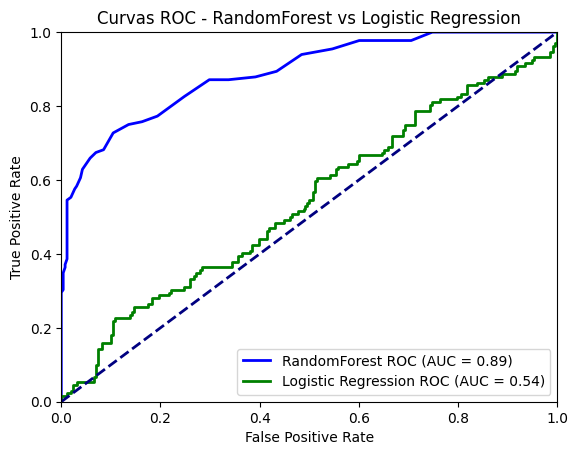

In [69]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Obtener las probabilidades para la clase 1 (positiva) del modelo de Regresión Logística
y_pred_prob_log = classifier.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR y AUC para RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calcular FPR, TPR y AUC para Regresión Logística
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Graficar ambas curvas ROC
plt.figure()

# Curva ROC para RandomForest
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'RandomForest ROC (AUC = {roc_auc_rf:.2f})')

# Curva ROC para Regresión Logística
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Logistic Regression ROC (AUC = {roc_auc_log:.2f})')

# Diagonal de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Establecer límites
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Etiquetas y título
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC - RandomForest vs Logistic Regression')

# Leyenda
plt.legend(loc="lower right")

# Mostrar la gráfica
plt.show()


# RandomOverSampler

In [70]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Verificar la distribución de clases antes y después del sobremuestreo
print(f"Distribución de clases antes del sobremuestreo: {Counter(y_train)}")
print(f"Distribución de clases después del sobremuestreo: {Counter(y_resampled)}")

# 4. Crear el modelo de regresión logística
classifier_ros = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Ajustar el modelo a los datos resampleados
classifier_ros.fit(X_resampled, y_resampled)

# 6. Hacer predicciones con los datos de prueba
y_pred = classifier_ros.predict(X_test)

# 7. Evaluar el rendimiento del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

Distribución de clases antes del sobremuestreo: Counter({0.0: 573, 1.0: 336})
Distribución de clases después del sobremuestreo: Counter({0.0: 573, 1.0: 573})
Matriz de confusión:
[[247  11]
 [ 83  49]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84       258
         1.0       0.82      0.37      0.51       132

    accuracy                           0.76       390
   macro avg       0.78      0.66      0.68       390
weighted avg       0.77      0.76      0.73       390

Exactitud: 0.76


# SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5,random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con SMOTE
classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_smote = classifier_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

print(f"Distribución de clases después del sobremuestreo: {Counter(y_train_resampled_smote)}")

# Realizar predicciones y evaluar SMOTE
y_pred_smote = modelo_smote.predict(X_test)
print("Resultados con SMOTE:")
print(classification_report(y_test, y_pred_smote))
print(f"Exactitud: {accuracy_score(y_test, y_pred_smote):.2f}")

Distribución de clases después del sobremuestreo: Counter({0.0: 573, 1.0: 573})
Resultados con SMOTE:
              precision    recall  f1-score   support

         0.0       0.75      0.97      0.84       258
         1.0       0.84      0.37      0.52       132

    accuracy                           0.76       390
   macro avg       0.80      0.67      0.68       390
weighted avg       0.78      0.76      0.73       390

Exactitud: 0.76


In [72]:
classifier_smote = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_smote = classifier_smote.fit(X_train_resampled_smote, y_train_resampled_smote)

#Realizar predicsiones en train
y_train_smote = modelo_smote.predict(X_train_resampled_smote)
print("Resultados con SMOTE:")
print(classification_report(y_train_resampled_smote, y_train_smote))

Resultados con SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       573
         1.0       1.00      1.00      1.00       573

    accuracy                           1.00      1146
   macro avg       1.00      1.00      1.00      1146
weighted avg       1.00      1.00      1.00      1146



# TomekLinks

In [73]:
from imblearn.under_sampling import TomekLinks

# Opción 2: Solo Tomek Links
tomek = TomekLinks()
X_train_resampled_tomek, y_train_resampled_tomek = tomek.fit_resample(X_train, y_train)

# Entrenar el modelo con Tomek Links
classifier_tomek = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_tomek = classifier_tomek.fit(X_train_resampled_tomek, y_train_resampled_tomek)

# Realizar predicciones y evaluar Tomek Links
y_pred_tomek = modelo_tomek.predict(X_test)
print("Resultados con Tomek Links:")
print(classification_report(y_test, y_pred_tomek))
print(f"Exactitud:{accuracy_score (y_test, y_pred_tomek):.2f}")


Resultados con Tomek Links:
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       258
         1.0       0.79      0.38      0.51       132

    accuracy                           0.76       390
   macro avg       0.77      0.66      0.68       390
weighted avg       0.76      0.76      0.73       390

Exactitud:0.76


# SMOTETomek


In [74]:
from imblearn.combine import SMOTETomek


smotetomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train, y_train)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

modelo_datos_SMOTETomek= classifier.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred_SMOTETomek = modelo_datos_SMOTETomek.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred_SMOTETomek))
print(f"Exactitud:{accuracy_score(y_test,y_pred_SMOTETomek):.2f}")

              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84       258
         1.0       0.84      0.39      0.53       132

    accuracy                           0.77       390
   macro avg       0.79      0.67      0.69       390
weighted avg       0.78      0.77      0.74       390

Exactitud:0.77


# XGBoost

In [75]:
!pip install xgboost

In [76]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = xgb_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.71
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       172
         1.0       0.59      0.47      0.52        88

    accuracy                           0.71       260
   macro avg       0.67      0.65      0.66       260
weighted avg       0.70      0.71      0.70       260



# Bootstrap

In [77]:


X = df_horse_encoded.drop(columns=['resultado_lived'])
y = df_horse_encoded['resultado_lived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest con Bootstrap activado (es el valor predeterminado)
rf_model = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)

rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.78
Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       172
         1.0       0.92      0.38      0.53        88

    accuracy                           0.78       260
   macro avg       0.84      0.68      0.69       260
weighted avg       0.81      0.78      0.74       260



# Stratified K-Fold con parametros optimizados de GridSearchCV



*   GridSearchCV: Busca los mejores hiperparámetros de un modelo probando todas las
combinaciones posibles y utilizando validación cruzada para evaluar el rendimiento.
*   Stratified K-Fold: Es un método de validación cruzada que divide el dataset de manera que la proporción de clases se mantenga equilibrada en cada fold, ideal para datasets desbalanceados.


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


# Definir los parámetros que deseas probar en el GridSearch
param_grid = {
    'n_estimators': [ 100, 150, 180],
    'max_depth': [10,12,15]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear el clasificador RandomForest
clf = RandomForestClassifier()

# Crear el objeto StratifiedKFold con 5 divisiones (k=5)
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=S_kfold, scoring='accuracy', return_train_score=True, verbose=3)

# Ajustar el GridSearch en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador del GridSearch
best_params = grid_search.best_params_


print("Mejores hiperparámetros:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=10, n_estimators=100;, score=(train=0.993, test=0.736) total time=   0.5s
[CV 2/5] END max_depth=10, n_estimators=100;, score=(train=0.992, test=0.774) total time=   0.5s
[CV 3/5] END max_depth=10, n_estimators=100;, score=(train=0.984, test=0.793) total time=   0.5s
[CV 4/5] END max_depth=10, n_estimators=100;, score=(train=0.976, test=0.731) total time=   1.2s
[CV 5/5] END max_depth=10, n_estimators=100;, score=(train=0.993, test=0.734) total time=   0.4s
[CV 1/5] END max_depth=10, n_estimators=150;, score=(train=0.994, test=0.745) total time=   0.5s
[CV 2/5] END max_depth=10, n_estimators=150;, score=(train=0.995, test=0.779) total time=   0.4s
[CV 3/5] END max_depth=10, n_estimators=150;, score=(train=0.995, test=0.808) total time=   0.4s
[CV 4/5] END max_depth=10, n_estimators=150;, score=(train=0.987, test=0.716) total time=   0.4s
[CV 5/5] END max_depth=10, n_estimators=150;, score=(train=0.994, t

In [84]:
results = grid_search.cv_results_

# guardemos lo más importante dentro de un dataframe
df = pd.DataFrame(results)


df = df[['mean_train_score', 'mean_test_score', 'params']]
df.round(3).sort_values("mean_test_score", ascending=False)

mean_train_score  mean_test_score                                  params
5             1.000            0.759  {'max_depth': 12, 'n_estimators': 180}
1             0.993            0.758  {'max_depth': 10, 'n_estimators': 150}
6             1.000            0.758  {'max_depth': 15, 'n_estimators': 100}
4             1.000            0.757  {'max_depth': 12, 'n_estimators': 150}
2             0.993            0.756  {'max_depth': 10, 'n_estimators': 180}
7             1.000            0.756  {'max_depth': 15, 'n_estimators': 150}
8             1.000            0.756  {'max_depth': 15, 'n_estimators': 180}
0             0.987            0.754  {'max_depth': 10, 'n_estimators': 100}
3             1.000            0.753  {'max_depth': 12, 'n_estimators': 100}




> Optimizando parametros para LogisticRegression





In [80]:

# Definir los parámetros que deseas probar en el GridSearch para LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularización
    'solver': ['liblinear', 'lbfgs'],  # Solvers posibles
    'max_iter': [100, 200, 300]  # Iteraciones máximas
}

# Crear el clasificador LogisticRegression
lr = LogisticRegression()

# Crear el objeto StratifiedKFold con 5 divisiones (k=5)
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=S_kfold, scoring='accuracy', return_train_score=True, verbose=3)

# Ajustar el GridSearch en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador del GridSearch
best_params2 = grid_search.best_params_

print("Mejores hiperparámetros:", best_params2)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.01, max_iter=100, solver=liblinear;, score=(train=0.637, test=0.639) total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, solver=liblinear;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, solver=liblinear;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, solver=liblinear;, score=(train=0.635, test=0.639) total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, solver=liblinear;, score=(train=0.637, test=0.638) total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, solver=lbfgs;, score=(train=0.637, test=0.639) total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, solver=lbfgs;, score=(train=0.640, test=0.625) total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, solver=lbfgs;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, solver=lbfgs;, score=(train=0.637, test=0.630) total time=   0.0s
[CV 5/5] 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.1, max_iter=100, solver=lbfgs;, score=(train=0.665, test=0.667) total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, solver=liblinear;, score=(train=0.637, test=0.639) total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, solver=liblinear;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, solver=liblinear;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, solver=liblinear;, score=(train=0.635, test=0.639) total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, solver=liblinear;, score=(train=0.637, test=0.638) total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, solver=lbfgs;, score=(train=0.637, test=0.639) total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, solver=lbfgs;, score=(train=0.640, test=0.625) total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, solver=lbfgs;, score=(train=0.638, test=0.635) total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, solver=lbfgs;, score=(train=0.677, test=0.625)

# Random Forest Optimizado

Se agrego los resultados de GridSerch (n_estimators=180, max_depth=12)

In [86]:
X = df_horse_encoded.drop('resultado_lived', axis=1)
y = df_horse_encoded['resultado_lived']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Crear el clasificador RandomForest
rf_model = RandomForestClassifier(n_estimators=180, random_state=42, max_depth=12)


# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       166
         1.0       0.93      0.43      0.58        94

    accuracy                           0.78       260
   macro avg       0.84      0.70      0.72       260
weighted avg       0.82      0.78      0.75       260

